# Introduction

This manual defines and documents the conventions, methodology, and information flow associated with the System Advisor Model (SAM) physical trough model in the System Advisor Model [10]. A detailed overview of each subsystem is provided, with the engineering/mathematical basis laid out where appropriate. While this documentation contains general information on the model structure, the beginning modeler may find portions of the content challenging. For an introductory overview on how to use the model, please refer to the System Advisor help system. Definitions of technical terms (denoted with _italic_ text) are provided in the Glossary of Terms at the end of this document (page 112).

The System Advisor Model provides a consistent framework for analyzing and comparing power system costs and performance across the range of solar technologies and markets, from photovoltaic (PV) systems for residential and commercial markets to concentrating solar power and large PV systems for utility markets.

System Advisor is based on an hourly simulation engine that interacts with performance, cost, and finance models to calculate energy output, energy costs, and cash flows. The software can also account for the effect of incentives on cash flows. System Advisor's spreadsheet interface allows for exchanging data with external models developed in Microsoft(r) Excel. Most of System Advisor's inputs can be used as parametric variables for sensitivity studies to investigate impacts of variations in performance, cost, and financial parameters on model results.

## _TRNSYS simulation framework_

System Advisor models system performance using the TRNSYS1 software developed at the University of Wisconsin combined with customized components. TRNSYS is a validated, time-series simulation program that can simulate the performance of photovoltaic, concentrating solar power, water heating systems, and other renewable energy systems using hourly resource data. TRNSYS is integrated into System Advisor so there is no need to install TRNSYS software or be familiar with its use to run Solar Advisor.

Footnote 1: For more information on the TRNSYS software, refer to documentation from the University of Wisconsin at sel.me.wisc.edu/trnsys/default.htm

The default source code folder \SAM\<version number>\exelib\trnsys\source contains the FORTRAN code for each TRNSYS module: sam_mw_trough_Type250.f90 (solar field), sam_mw_trough_Type251.f90 (storage and dispatch), sam_mw_pt_Type224.f90 (power cycle), and the shared HTF property subroutines sam_mw_pt_Type229.f90 and sam_mw_pt_propmod.

## _Variable Names and Abbreviations_

The following tables contain information and conventions used in this document. Table 1 lists the abbreviations, Table 2 lists variable naming conventions, and Table 3 list commonly used variable subscript conventions.

\begin{array}{l|l}
\textbf{Abbreviation} & \textbf{Description} \\
\hline
ACC & Air-cooledcondenser \\
CSP & Concentrating SolarPower \\
DNI & Direct-normal irradiation \\
HTF & Heat transfer fluid \\
IAM & Incidence anglemodifier \\
IOCop & Inlet/outlet/cross-overpipe \\
ITD & Initial temperaturedifference \\
LHV & Lowerheatingvalue \\
NREL & National RenewableEnergyLaboratory \\
SAM & System AdvisorModel \\
TES & Thermal energystorage \\
TOU & Timeofuse \\
\hline
\end{array}

\begin{array}{|l|l|l|l|}
\hline
\textbf{Name} & \textbf{Description} & \textbf{Units} & \textbf{Units Abbrv.} \\
\hline
A & Area & meters squared & m^2 \\
c, c_{p} & Specific heat & Joules per kilogram Kelvin & \frac{J}{kgK} \\
C & Calculation coefficient & varies & varies \\
\dot{C} & Thermal capacity rate & Watts per Kelvin & \frac{W}{K} \\
D & Diameter & meters & m \\
E & Energy & Joules & J \\
g & Gravitation constant & meters per sq. second & \frac{m}{s^2} \\
f & Fraction & none & none \\
fr & Friction factor & none & none \\
h & Enthalpy & Joules per kilogram & \frac{J}{kg} \\
H & Height & meters & m \\
i,j & Counting indexes & none & none \\
I_{bn} & Direct solar irradiation & Watts per sq. meter & \frac{W}{m^2} \\
k & Thermal conductivity & Watts per meter-Kelvin & \frac{W}{m\cdot K} \\
L & Length & meters & m \\
m & Mass & kilograms & kg \\
\dot{m} & Mass flow rate & kilograms per second & \frac{kg}{s} \\
(mc) & Thermal inertia & Joules per Kelvin & \frac{J}{K} \\
N & Integer number & none & none \\
Nu & Nusselt number & none & none \\
P & Pressure & Pascals & Pa \\
Pr & Prandtl number & none & none \\
\dot{q} & Heat transfer rate & Watts & W \\
\dot{Q} & Cycle heat absorption rate & Watts & W \\
r & Ratio & none & none \\
R & Radius & meters & m \\
\dot{R} & Thermal resistance & Watts per Kelvin & \frac{W}{K} \\
Ra & Rayleigh number & none & none \\
Re & Reynolds number & none & none \\
s & Entropy & Joules per kilogram Kelvin & \frac{J}{kg} \\
T & Temperature & Kelvin & K \\
\overline{T} & Average temperature & Kelvin & K \\
t & Time & seconds & s \\
u & Specific internal energy & Joules per kilogram & \frac{J}{kg} \\
U & Internal energy & Joules & J \\
UA & Thermal conductance & Watts per Kelvin & \frac{W}{K} \\
v & Velocity & meters per second & \frac{m}{s} \\
\overline{V} & Volume & meters cubed & m^3 \\
\dot{W} & Cycle power output & Watts & W \\
\hline
\end{array}

\begin{array}{|l|l|l|l|}
\hline
\textbf{Name} & \textbf{Description} & \textbf{Units} & \textbf{Units Abbrv.} \\
\hline
\alpha & Absortance & none & none \\
\beta & Volumetric expansion coef. & inverse Kelvin & \frac{1}{K} \\
\Delta & Change in value & none & none \\
\gamma & Thermal loss coefficient & Watts per sq. meter Kelvin & \frac{W}{m^{2}\cdot K} \\
\gamma_{sol} & Solar azimuth & degrees & \circ \\
\delta & Solar declination & degrees & \circ \\
\eta & Efficiency & none & none \\
\theta & Aperture incidence angle & degrees & \circ \\
\theta_{e}/\theta_{z} & Solar elevation/zenith & degrees & \circ \\
\varepsilon & Emittance / Effectiveness & none & none \\
\mu & Dynamic viscosity & Pascal-seconds & Pa\cdot s \\
\nu & Kinematic viscosity & sq. meters per second & \frac{m^{2}}{s} \\
\pi & Pi & none & none \\
\rho & Density & kilograms per cubic meter & \frac{kg}{m^{3}} \\
\tau & Transmittance & none & none \\
\phi & Latitude & degrees & \circ \\
\chi & Thermodynamic quality & none & none \\
\psi & Longitude & degrees & \circ \\
\omega & Hour angle & degrees & \circ \\
\hline
\end{array}

\begin{array}{|l|l|l|l|} \hline
0 & \text{Previous value / initial value} & h_{\text{rsec}} & \text{Header section} \\
1..9 & \text{Item } n \text{ in a sequence} & h_{\text{grp}} & \text{Header section groups} \\ 
_{\text{tank}} & \text{Single tank} & h_{\text{l}} & \text{Heat loss} \\ 
_{.4} & \text{Available} & h_{\text{sec}} & \text{Header sections} \\ 
_{\text{abs}} & \text{Absorbed} & h_{\text{tf}} & \text{Heat transfer fluid} \\ 
_{\text{adj}} & \text{Adjusted} & h_{\text{yd}} & \text{Hydraulic} \\ 
_{\text{air}} & \text{Ambient air} & h_{\text{x}} & \text{Heat exchanger} \\ 
_{\text{amb}} & \text{Ambient} & \text{in} & \text{Inlet} \\ 
_{\text{ap}} & \text{Aperture} & \text{inc} & \text{Incident} \\ 
_{\text{approach}} & \text{Approach temperature} & \text{loop} & \text{All SCA’s in a loop} \\ 
_{\text{aux}} & \text{Auxiliary (fossil)} & \text{LHV} & \text{Lower heating value} \\ 
_{\text{ave}} & \text{Average} & m & \text{Mirror} \\ 
_{\text{bal}} & \text{Balance-of-plant} & \text{min} & \text{Minimum} \\ 
_{\text{bd}} & \text{Blowdown} & \text{max} & \text{Maximum} \\ 
_{\text{boil}} & \text{Steam boiler} & \text{ND} & \text{Non-dimensional, normalized} \\ 
_{\text{brae}} & \text{Bracket} & \text{net} & \text{Net electric} \\ 
c & \text{Cold} & \text{opt} & \text{Optical} \\ 
_{\text{cap}} & \text{Capacity} & \text{out} & \text{Outlet} \\ 
_{\text{calc}} & \text{Calculated} & p & \text{Pump} \\ 
_{\text{chg}} & \text{Charging} & \text{par} & \text{Parasitic} \\ 
_{\text{col}} & \text{Collector} & \text{pb} & \text{Power block (or power cycle)} \\ 
_{\text{cond}} & \text{Conduction / condenser} & \text{pm} & \text{Per meter basis} \\ 
_{\text{conv}} & \text{Convection} & \text{rad} & \text{Radiation} \\ 
_{\text{cs}} & \text{Cross-sectional} & \text{rec} & \text{Receiver} \\ 
_{\text{cw}} & \text{Cooling water} & \text{rej} & \text{Rejected} \\ 
_{\text{cycle}} & \text{Power cycle} & \text{run} & \text{Runner pipe} \\ 
_{\text{db}} & \text{Dry-bulb} & \text{runsec} & \text{Runner section} \\ 
_{\text{def}} & \text{Defocus} & s & \text{Isentropic} \\ 
_{\text{dem}} & \text{Demand} & \text{sby} & \text{Standby} \\ 
_{\text{des}} & \text{Design point} & \text{sca} & \text{Solar collector assembly} \\ 
_{\text{dis}} & \text{Discharging} & \text{setpoint} & \text{Design point or setpoint} \\ 
_{\text{drift}} & \text{Condenser drift} & \text{sf} & \text{Solar field} \\ 
_{\text{dump}} & \text{Dumped energy} & \text{sol} & \text{Solar} \\ 
_{\text{duy}} & \text{Heat exchanger duty} & \text{spacing} & \text{Row spacing} \\ 
e & \text{Electric} & \text{st} & \text{Steam} \\ 
_{\text{env}} & \text{Envelope} & \text{start} & \text{Startup} \\ 
f & \text{Focal} & \text{sys} & \text{System} \\ 
_{\text{fan}} & \text{Cooling fan} & \text{tes} & \text{Thermal energy storage} \\ 
_{\text{fin}} & \text{Final} & \text{th} & \text{Thermal} \\ 
_{\text{fsec}} & \text{Field sections} & \text{tot} & \text{Total} \\ 
_{\text{fuel}} & \text{Fossil fuel} & \text{tou} & \text{Time of use} \\ 
g & \text{Guess} & \text{track} & \text{Collector tracking} \\ 
_{\text{gross}} & \text{Gross electric} & \text{trans} & \text{Transient} \\ 
_{\text{fp}} & \text{Freeze protection} & w & \text{Water} \\ 
h & \text{Hot} & \text{wb} & \text{Wet-bulb} \\ 
_{\text{hdr}} & \text{Header} & \uparrow/\downarrow & \text{Increase / Decrease} \\ 
\hline 
\end{array}

## Background and Modeling Approach

The physical trough model characterizes a parabolic trough CSP plant by deriving performance equations from first principles of heat transfer and thermodynamics where possible. In practice, this means that empirical "curve-fit" relationships are eliminated to the degree that is practical for the type of modeling analysis done in System Advisor. The primary benefit of this approach is the added flexibility in changing system parameters and component properties at a fundamental level (i.e. absorber emissivity, glass thickness, etc.) and simulating their impact on overall system performance. With this increased flexibility come a few drawbacks; these include the addition of multiple layers of modeling uncertainty and the increased opportunity for divergence in the results from a real system. While an empirical model can produce high accuracy over the range of parameters used in its development, such models cannot provide predictive performance outside these ranges. Both the physical and empirical trough models are included in System Advisor to allow for comparisons between the physical and empirical modeling approaches.

Besides fulfilling the goal of deriving system performance from first principles, the physical modeling approach achieves several other objectives: the model includes transient effects related to the thermal capacity of the HTF in the field piping, headers, and the balance of the plant; it allows for more flexible field component specification, including multiple receiver and collector types within a single loop; it maintains a reasonably short run-time allowing for parametric and statistical analyses; and it makes use of existing models where possible. Previously existing subsystem models that are adapted and incorporated into the physical model include the collector model from System Advisor's empirical trough model, the receiver heat loss model [8], a field piping pressure drop model [14], and the power cycle performance model [20] originally developed for System Advisor's power tower CSP system model. These models are discussed in more detail in dedicated sections of this report.

# Solar Field

The solar field is the heat-collecting portion of the plant. It consists of one or more _loops_ of solar collector assemblies (_SCA's_), with each loop laid out in parallel. A common _header_ pipe provides each loop with an equal flow rate of heat transfer fluid (HTF), and a second header collects the hot HTF to return it either directly to the _power cycle_ for power generation or to the thermal energy storage system for use at a later time. To minimize pumping pressure losses, the field is typically divided into multiple sections, each section with its own header set, and the power cycle is situated near the middle of the field. Figure 1 shows one possible plant layout where two header sections are used for 20 total loops.

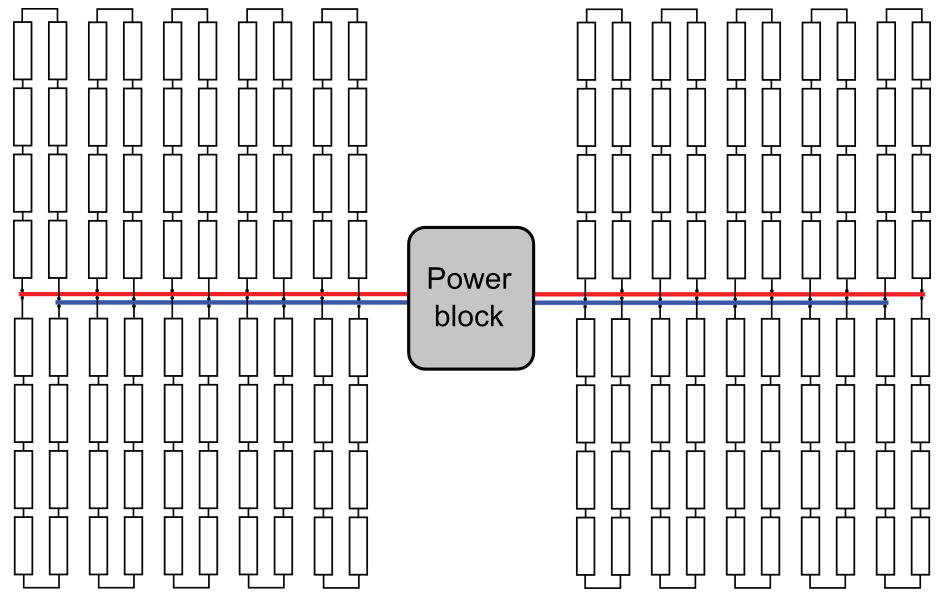

Figure 1: Onepossible field arrangement, where the field is broken up into two header sections.
Each loop in this illustration contains 8 individual SCA’s, and each portion of the header is connected to two loops-one on the top and one on the bottom of the image.

## Energy balance

Within each loop, a number of SCA's are used to incrementally heat the HTF to the design outlet temperature. Each SCA is composed of a number of parabolic _collectors_ and their _receivers2_ in series that share a single common tracking drive. In this model, the SCA serves as the lowest level of discretization. Each SCA is treated as an independent calculation node within the loop, and the absorbed energy, losses, temperature, pressure drop, and other performance values are calculated independently for each SCA. This allows each SCA to impact performance separately and potentially allows each SCA to contain different receiver and/or collector attributes. System Advisor allows the user to specify unique geometry and performance characteristics for each SCA in the loop up to a limit of four unique configurations. The order in which the SCA's are defocused in the loop during high-flux conditions can also be modified under this framework. Figure 2 illustrates these principles.

Figure 1: One possible field arrangement, where the field is broken up into two header sections. Each loop in this illustration contains 8 individual SCA’s, and each portion of the header is connected to two loops - one on the top and one on the bottom of the image.

### Nodal Energy Balance
A typical steady-state receiver model determines the temperature rise across the node by considering the absorbed energy, the mass flow rate of HTF through the receiver, and the specific heat of the HTF. This energy balance for node \(i\) is represented in Eq.[2.1].

$$\Delta T_{i}=T_{out,i}-T_{in,i}=\frac{\dot{q}_{abs}}{\dot{m}_{htf}\,c_{htf}} \tag{2.1}$$

However, in the case of the parabolic trough technology, the thermal inertia associated with the energy state of the node can impact performance to the extent that a steady-state model is insufficient; thus transient terms must be included. The most significant transient effect in the solar field is the thermal mass of the HTF in the headers and in the receiver piping, so we need to consider the change in energy of the HTF in deriving the energy balance equations. We'll start with the energy balance for a single SCA node drawn in Figure 3.

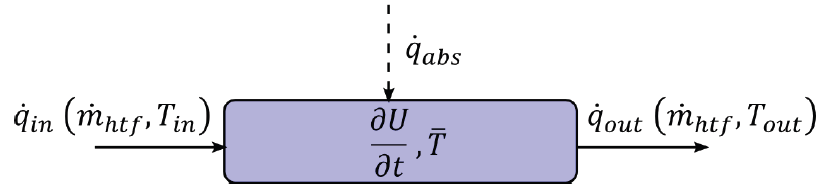

Figure 3:EnergybalanceforthereceiversinanSCA.Theenclosedboxrepresentsthecontrol volume, encompassingtheHTFwithintheabsorbertubesandpipingforasingleSCA.

The energy balance above shows a receiver tube with an inlet flow, outlet flow, absorbed energy (net absorption is positive, net loss is negative), and an internal energy term. The $\dot{q}$ heat flows are functions of the mass flow rate $\left(\dot{m}_{htf}\right)$ which is constant across the boundary, and the temperatures $T_{in}$ and $T_{out}$. The average nodal temperature $\overline{T}$ is equal to the average of the inlet and outlet temperatures of the calculation node, since the temperature rise across the node is assumed to be linear.

The internal energy term $\frac{\partial U}{\partial t}$ represents the change in energy of the node as a function of time $t$. Equivalently, this term can be expressed as:

$$\frac{\partial U}{\partial t}=\left(m\;c_{htf}+(mc)_{bal,sca}\;L\right)\;\frac {\partial T}{\partial t} \tag{2.2}$$

Here, $m$ is the mass of the HTF contained in the node, $L$ is the length of a single SCA, and $c_{htf}$ is the specific heat of the HTF. An additional thermal inertia term $\left(mc\right)_{bal,sca}$ is included to account for the thermal mass of piping, joints, insulation, and other SCA components that thermally cycle with the HTF. The $\left(mc\right)_{bal,sca}\;L$ term is dimensionally equivalent to the HTF capacitance term $m\cdot c_{htf}$, even though it is input into the model as a single value. This convention eliminates the need for specific knowledge of either the exact mass or specific heat of the additional thermal inertia while still allowing the user to account for the inertia effect. This term is dimensionally defined to represent the amount of thermal energy per meter of collector length required to raise the temperature of the node one degree K. The input units are $\frac{{W}t-h}{{m-K}}$, and the value is converted within the code to units of $\frac{{J}}{{m-K}}$.

Note that in terms of the mathematical formulation, the HTF and material properties are assumed to be constant. However, when evaluating system performance, **material and HTF thermal properties are evaluated as functions of temperature** (and pressure, if applicable).

The total energy balance in the control volume is:

$$\dot{q}_{in}+\dot{q}_{abs}=\frac{\partial U}{\partial t}+\dot{q}_{out} \tag{2.3}$$

The inlet and outlet heat flows can be expressed as:

$$\dot{q}_{in}-\dot{q}_{out} = \dot{m}_{htf}\;c_{htf}\;\left(T_{in}-T_{out}\right)$$
$$= 2\;\dot{m}_{htf}\;c_{htf}\;\left(T_{in}-\overline{T}\right)\tag{2.4}$$

Substituting this equation and the definition for the internal energy term into the energy balance equation, then solving for the first differential, the result is:

$$\frac{\partial\overline{T}}{\partial t}=\frac{2\;\dot{m}_{htf}(T_{in}- \overline{T})+\dot{q}_{abs}}{m\;c_{htf}+(mc)_{bal,sca}} \tag{2.5}$$

This is a linear first order differential equation, which has the general solution:

$$\overline{T}=\frac{\dot{q}_{abs}}{2\ \dot{m}_{htf}\cdot c_{htf}}+C_{1}\exp\left[- \frac{2\ \dot{m}_{htf}\ c_{htf}}{m\ c_{htf}+(mc)_{bal,sca}}\Delta t\right]+T_{in} \tag{2.6}$$

This equation has an unknown constant $C_{1}$ that can be determined by enforcing a boundary condition. In this situation, we know that the average nodal temperature $\overline{T}=\overline{T}_{0}$ at the beginning of the time step when $t=0$, and we define $\overline{T}_{0}$ to be the temperature $\overline{T}$ at the end of the previous time step (the average temperature is $\overline{T}=\frac{T_{out}+T_{in}}{2}$. Thus, solving for the unknown constant $C_{1}$:

$$\overline{T}_{0} = \overline{T}|_{t=0}$$

$$= \frac{\dot{q}_{abs}}{2\cdot\dot{m}_{htf}\ c_{htf}}+C_{1}e^{0}+T_{ in}$$ 

$$C_{1} = \overline{T}_{0}-\frac{\dot{q}_{abs}}{2\cdot\dot{m}_{htf}\ c_{ htf}}-T_{in} \tag{2.7}$$

Finally, we substitute the constant into the general solution to find the final equation for the outlet temperature from each SCA shown in Eq.[2.8].

$\text{For } i=1, N_{\text{sca}}:$

$$T_{out,i} = 2\ \overline{T}_{i}-T_{in,i}$$

$$T_{out,i} = \frac{\dot{q}_{abs,i}}{\dot{m}_{htf}\ c_{htf,i}}+T_{in,i} \tag{2.8}$$

 $$+2\cdot\left(\overline{T}_{0,i}-\frac{\dot{q}_{abs,i}}{2\cdot \dot{m}_{htf}\ c_{htf,i}}-T_{in,i}\right)\exp\left[\frac{-2\ \dot{m}_{htf}\ c_{htf,i}\ \Delta t}{m_{i}\ c_{htf,i}+mc_{i,bal,sca}\ L_{i}}\right]$$

This equation is applied to each node $i$ in the loop, where $T_{in,i}$ is equal to the outlet temperature of the previous node in the loop, $T_{out,i-1}$. Since the calculated temperature for each node depends on both the inlet temperature of the previous node and the node temperature from the previous time step, these values must be established as boundary conditions. The temperature of the node at the previous time step is stored from time step to time step, and the inlet temperature is set equal to the outlet temperature of the previous node for each but the first node in the loop to satisfy these requirements. The HTF mass of each node is calculated as a function of the receiver piping volume and the local HTF density.

$\text{For } i=1, N_{\text{sca}}:$

$$m_{i}=\rho_{htf,i}\ L_{i}\ A_{cs,i} \tag{2.9}$$

The inlet temperature at the first node, representing the inlet of the entire field, requires additional consideration. In a similar derivation process as the one described in Figure 3, a "system" temperature is calculated for both the hot and cold sides of the solar field. The cold system temperature is used as the node #1 inlet temperature, and the hot system temperature is used as the effective solar field outlet temperature. These values incorporate the thermal inertia associated with the header and balance-of-plant HTF mass. Under steady-state conditions, the loop inlet HTF temperature equals either:

* the power cycle outlet temperature
* the storage loop outlet temperature
* a mass-flow weighted average of the storage and power cycle outlet temperatures
* or the solar field outlet temperature (during nighttime recirculation)

depending on the control situation. However, directly using any of these outlet temperatures as the loop inlet value is inaccurate because it fails to account for the thermal inertia of the header. If we include thermal inertia as a transient effect, the derived equation for loop inlet temperature (denoted $T_{sys,c}$) is shown in Eq.[2.10].

$$T_{sys,c}=\left(T_{sys,c,0}-T_{sf,in}\right)\exp\left[-\frac{\dot{m}_{hf}}{\overline{V} _{c}\cdot\rho_{c}+\frac{(mc)_{bal,c}}{c_{c}}}\Delta t\right]+T_{sf,in} \tag{2.10}$$

Here, the cold header temperature from the last time step is $T_{sys,c,0}$, the volume in the cold header and the runner pipe is given by $\overline{V}_{c}$, and cold fluid density is $\rho_{c}$. Analogously, the hot system outlet temperature combines loop outlet flow, the header and runner pipe volumes, and the state of the system at the last time step.

$$T_{sys,h}=\left(T_{sys,h,0}-T_{loop,out}^{*}\right)\exp\left[-\frac{\dot{m}_{hf}}{ \overline{V}_{h}\cdot\rho_{h}+\frac{(mc)_{bal,h}}{c_{h}}}\Delta t\right]+T_{ loop,out}^{*} \tag{2.11}$$

Here, $T_{loop,out}^{*}$ represents the heat-loss adjusted loop outlet temperature calculated in Eq. [2.26]. The capacity term $(mc)_{bal,h}$ (or $(mc)_{bal,c}$ for the cold header) is used to account for any thermal inertia that isn't included in the HTF volume calculations. Varying this term effectively adds or subtracts internal energy capacity to the HTF in the system; its best use is as an empirical adjustment factor to help match observed plant performance. This variable is defined in terms of the thermal power (kilowatt hours) per gross electricity capacity (Megawatts) needed to raise the header temperature one degree Celsius. The $(mc)_{bal,h}$ term is applied specifically to the temperature calculation for the hot header, while $(mc)_{bal,c}$ describes only the additional cold header thermal inertia.

To illustrate this concept, consider the following example. A hypothetical 100 $MWe$ (gross) trough plant with a 35% conversion efficiency is observed starting up from a cold overnight temperature of $140^{\circ}C$. The system temperature increases a total of $150^{\circ}C$ to $290^{\circ}C$ after 1 hour of running the solar field at full load. A modeler predicts from known HTF inventory that the plant should have reached its startup temperature in only 30 minutes. Thus, the $\left(mc\right)_{bal}$ terms must together account for an half of the full-load hour that the plant took to start up. Assuming both coefficients are equal, the hot-side coefficient would be calculated as follows:

$$\begin{array}{rcl}(mc)_{bal,h}&=&\frac{0.5}{2\cdot 0.35}\cdot\frac{100,000[kWe]}{ 100[MWe]\cdot 150[K]}\\ \\ (mc)_{bal,h}&=&4.8\left[\frac{kWhr}{MWe_{cap}\cdot K}\right]\end{array} \tag{2.12}$$

Realistically, the value calculated here will be lower once the thermal inertia of the solar field piping, insulation, and joints are considered. This calculation is only provided as a demonstration of the procedure for determining an empirical thermal inertia term, and the user should carefully select their input to model their desired system.

Section 2.1 Summary

* The model calculates solar field temperatures and corresponding performance values independently at each SCA specified in the loop.
* Each SCA can have a different associated collector or receiver, up to four in total.
* The performance of one loop is representative of each loop in the field.
* The model determines the solar field inlet temperature by accounting for the return flow from storage/power cycle/field outlet and the volume of the cold header and piping.
* The model determines the solar field outlet temperature by accounting for the hot flow from the collection elements, the volume of the hot header and piping, and it adds user-specified thermal capacity terms that impact the transient behavior of the system.

### Solar Field Control

CSP plants convert direct normal irradiation (DNI) from the sun into thermal energy and eventually into electricity or some other useful product. DNI can vary significantly over a relatively short period of time, and the solar field in a trough plant must be designed to handle these variations. The solar field control algorithm uses user-specified input to make operational decisions based on the DNI resource level, ambient temperature, presence of thermal storage, etc. The minimum HTF mass flow rate, the maximum HTF mass flow rate, the HTF outlet temperature, defocus state, and the temperature of each node relative to the freeze-protection set point are parameters that are monitored and enforced by the field controller.

The field logic employs an "ideal" control strategy. This means that the HTF mass flow rate is controlled to allow the loop outlet temperature to meet the design point value when possible. Receiver heat loss and surface temperature are both functions of the HTF temperature, and HTF temperature in turn is a function of HTF mass flow rate, so the HTF temperature must be calculated iteratively. System Advisor uses successive substitution, where an initial estimate for the field mass flow rate is provided along with guessed temperature values, then the mass flow rate is recalculated and adjusted until the outlet temperature converges to the design value.

If the mass flow rate is calculated to fall outside of the acceptable range specified by the user, special control handling is required. The minimum and maximum allowable loop flow rates are specified indirectly by the user on the System Advisor Solar Field page through an allowable HTF velocity range. Eq.[2.13] shows how the minimum $\left(v_{htf,min}\right)$ and the maximum $\left(v_{htf,max}\right)$ HTF velocities are converted to mass flow rates.

$$\dot{m}_{htf,min} = v_{htf,min}\;\rho_{htf,c}\;\pi\;\left(\frac{D_{min}}{2}\right)^{2}$$
$$\dot{m}_{htf,max} = v_{htf,max}\;\rho_{htf,h}\;\pi\;\left(\frac{D_{min}}{2}\right)^{2} \tag{2.13}$$

Here, $\rho_{htf}$ represents the HTF density at the cold $\left(c\right)$ and hot $\left(h\right)$ design temperatures, and $D_{min}$ is the minimum diameter receiver tube that is present in the system.

The solar field mass flow rate is constantly adjusted within the upper and lower flow limits to maintain the desired HTF outlet temperature. Several methods of calculation are possible for determining the mass flow rate. System Advisor uses a customized numerical solution algorithm that considers the rate of change in the mass flow rate and HTF outlet temperature variables from iteration to iteration. Numerical techniques generally require an initial guess value, and this is the case for System Advisor. The initial mass flow guess is shown in Eq.[2.14].

$$\dot{m}_{htf,guess}=\frac{\sum_{i=1}^{N_{sca}}\dot{q}_{i,abs}\;N_{loops}}{c_{ htf,ave}\;(T_{loop,out,des}-T_{sf,in})} \tag{2.14}$$

Note that the average specific heat value refers to the integral average over the length of the collector loop, the HTF outlet temperature is the solar field design outlet temperature, and the inlet temperature is equal to the value provided by the power block or fluid source. Subsequent iterations depart from this energy balance basis by using the mass flow and temperature values from the previous iteration ($\dot{m}^{\prime}_{htf}$ and $T^{\prime}_{loop,out}$, respectively), and the values from the current iteration ($\dot{m}_{htf}$ and $T_{loop,out}$) to predict the mass flow for the next iteration ($\dot{m}^{*}_{htf}$). This calculation is shown in Eq.[2.15].

$$\dot{m}^{*}_{htf}=\dot{m}_{htf}+(\dot{m}_{htf}-\dot{m}^{\prime}_{htf})\cdot \left(\frac{T_{loop,out,des}-T_{loop,out}}{T_{loop,out}-T^{\prime}_{loop, out}}\right) \tag{2.15}$$

where:

$$-0.75\ \left|\dot{m}_{htf}\right|\leq\left[(\dot{m}_{htf}-\dot{m}^{\prime}_{htf})\cdot \left(\frac{T_{loop,out,des}-T_{loop,out}}{T_{loop,out}-T^{\prime}_{loop,out}} \right)\right]\leq 0.75\ \left|\dot{m}_{htf}\right| \tag{2.16}$$

The limits of $[-.75,+.75]$ in Eq. [2.16] were selected to promote model convergence and do not reflect any physical limit on the bounds of the mass flow rate. The limits apply from iteration-to-iteration within a single time step, while time-step-to-time-step variations in the mass flow rate may exceed these limits.

### 2.2.1 _Collector defocusing_

If the calculated mass flow rate through the loop falls below the minimum allowable flow rate $\left(\dot{m}_{htf,min}\right)$, then the code resets the flow rate to be equal to this minimum value and recalculates the outlet temperature of the loop, assuming a fixed flow rate. Thus, in conditions where the minimum criterion is not met, the outlet temperature from the field will fall below the design value.

In the opposite case, the solar field may absorb so much energy that the mass flow rate required to maintain the design outlet temperature exceeds the maximum specified value. Once the mass flow rate reaches an upper limit, the only way to avoid over-temperature HTF (and a dangerous situation) is to reduce the amount of absorbed energy by defocusing collectors. The plant controller can defocus collectors either when the amount of energy produced by the solar field exceeds what can be consumed in the power cycle and/or storage, or when the converged mass flow rate exceeds the value calculated in Eq.[2.13]. For the latter case, the logic considers the total amount of absorbed energy in each SCA in the field and defocuses the SCA's until the total absorbed energy falls below the threshold required by the maximum mass flow rate.

SCA's are defocused using one of three user-selected schemes.

#### Full SCA Defocusing

The first option allows the user to specify an order in which each SCA in a loop should be defocused. During defocusing periods, the SCA's will be completely defocused in successive order until the total absorbed power falls below the imposed limit. Note that thermal losses incurred by the defocused SCA(s) are still accounted for in all energy calculations. Eq.[2.17] shows how the code determines the number of collectors to defocus. The total effective thermal output power $q_{sf,eff}$ is reduced by the amount absorbed in each collector according to defocus order until the maximum allowable thermal output $q_{sf,limit}$ is met.The array items $A[i]$ indicate the order of defocusing requested by the user, and the subscripts $abs$, $hl$, and $inc$ refer to the absorbed thermal energy, thermal heat losses, and irradiation on each SCA, respectively.

For $i=1,N_{sca}$:

_And while_ $\dot{q}_{sf,eff}>\dot{q}_{sf,limit}$ and $i<=N_{sca}$:

$$\dot{q}_{sf,eff}=\dot{q}_{sf,eff}-\max\left[\left(\dot{q}_{A[i],abs}-\dot{q}_ {A[i],hl}\right),0\right] \tag{2.17}$$
_Then, for_ $j=1,i$:

$$\dot{q}_{i,inc}=0$$

This option is activated by clearing the **Allow partial defocusing** check box on the Solar Field page.

#### Partial Sequenced Defocusing

The second option also allows sequenced defocusing of SCA's, but instead of completely defocusing the SCA's, partial defocusing is allowed. Sometimes called feathering, this practice is implemented in real plants by modulating the tracking angle to partially shift the receiver out of the reflected radiation, thus reducing the intercept factor. This control scheme sequentially defocuses the SCA's according to the order specified on the Solar Field page, but allows one SCA to be defocused partially. The defocusing calculations in this mode require three steps: first, the number of affected SCA's is determined, second, the SCA's that are wholly unneeded are completely defocused, and third, the final defocused SCA is partially modulated to match the desired thermal output.

_For_ $i=1,N_{sca}$:

_And while_ $\dot{q}_{sf,eff}>\dot{q}_{sf,limit}$ and $i<=N_{sca}$:

$$\dot{q}_{sf,eff}=\dot{q}_{sf,eff}-\max\left[\left(\dot{q}_{A[i],abs}-\dot{q}_{ A[i],hl}\right),0\right] \tag{2.18}$$

_Then, for_ $j=1,i-1$:

$$\dot{q}_{i,inc}=0$$

_Finally, for_ $j=i$:

$$\dot{q}_{i,inc}=\dot{q}_{i,inc}\,\frac{\dot{q}_{sf,eff}-\sum_{j=i+1}^{N_{sca}} \dot{q}_{i,abs}}{\dot{q}_{i,abs}} \tag{2.19}$$

This option is selected by enabling the **Allow partial defocusing** check box and selecting the **Sequenced** option from the drop down menu.

#### Partial Simultaneous Defocusing

The final option implements defocusing by simultaneously partially defocusing all of the SCA's in the loop. Because all SCA's are defocused equally, the defocus order specified in the loop configuration control on the Solar Field page is disregarded. Eq.[2.20] shows the simple scaling method used for each SCA.

_For_ $i=1,N_{sca}$:

$$\dot{q}_{i,inc}=\dot{q}_{i,inc}\,\frac{\dot{q}_{sf,limit}}{\dot{q}_{sf,eff}} \tag{2.20}$$

Select this method by enabling the **Allow partial defocusing** check box and choosing the **Simultaneous** option in the drop down menu.

Note that the defocusing and control algorithms are iterative; consequently, the variables appearing on both sides of the equations from Eq.[2.17] through Eq.[2.20] are provided with initial values and are iteratively modified until the solution converges.

The model tracks and reports the total defocused energy (also called "dumped" energy). This value measures the amount of incident energy that is not allowed to reach the collector as a result of defocusing, and the reported value includes dumped energy caused by both the field controller and the general plant controller. Dumped energy is approximated by considering the product of the total aperture area $\left(A_{ap,tot}\right)$ collector optical efficiency during the time step $\left(\eta_{opt}\right)$, the solar irradiation $\left(I_{bn}\right)$ and the fraction of defocused SCA's during the time step $\left(\eta_{def}\right)$. Thermal losses are not included in the dumped energy calculation.

$$\dot{q}_{dump}=A_{ap,tot}\;I_{bn}\;\eta_{opt}\;\eta_{def} \tag{2.21}$$

### 2.2.2 Field freeze protection

During times of extended shutdown or cool nighttime temperatures, the heat transfer fluid in the solar field may cool to an unacceptably low temperature. To avoid this situation, electric heat trace equipment can provide supplemental heat to the HTF in the solar field. System Advisor models this situation by enforcing the minimum field HTF temperature specified as the freeze protection temperature on the Solar Field page. The temperatures in each node of the loop and in the headers are monitored. If the temperature falls below the minimum allowable value, heat is added to the system to maintain the temperature at the minimum value. This energy is tracked and reported as a parasitic loss. The magnitude of freeze protection energy is calculated for each of the $i$ nodes in the loop of $N_{sca}$ collector assemblies in Eq.[2.22].

$$E_{fp}=\sum_{i=1}^{N_{sca}}\left((T_{fp}-T_{htf,ave,i})\;A_{cs,i}\;L_{i}\;\rho _{htf}\;c_{htf}+\dot{q}_{i,hl}\right)\cdot N_{loops} \tag{2.22}$$

The total freeze protection energy $E_{fp}$ can be divided by the time step to determine the rate of energy consumption. In Eq.[2.22] the average node temperature is represented by $T_{htf,ave,i}$, the receiver tube cross-sectional area is $A_{cs,i}$, the length of the receiver tube for the node is $L_{i}$, and density and specific heat properties of the HTF are used. Likewise, the freeze protection energy required for the headers and runner piping is calculated in the following general form.

$$E_{fp,hdr}=\left(T_{fp}-T_{hdr}\right)\cdot\left(\overline{V}_{hdr}+ \overline{V}_{run}\right)\;\rho\;c_{p}+\dot{q}_{hl,hdr}+\dot{q}_{hl,run} \tag{2.23}$$

Electric heat tracing is assumed for the freeze protection parasitic.

#### 2.2.3 Accounting for transient effects

Unlike traditional utility-scale power plants, CSP systems are subject to frequent and significant temporal fluctuations in the thermal resource. Fossil or nuclear plants will spend most of their lifetime operating near design conditions, but CSP plants vary significantly in output over relatively small time periods. Thus, the impact of _transient_ effects may become significant in the overall performance of the plant. Simply including transient terms in the formulation of the system model (see Eq.[2.8] for example) may not be sufficient to adequately account for their impact. Instead, averaged equations that account for plant behavior over the duration of the time step are required.

Numerical simulations rely on an approximation that assumes that a continuous variable surface can be discretized into finite homogeneous sections. This is the case for the calculation of loop temperature depicted in Figure 2 where the collector loop is discretized according to the number of SCA's in the loop. Likewise, the time variable $t$ that is assumed to be continuous in the model formulation must be discretized for the numerical simulations performed by System Advisor. The challenge for CSP simulations that rely on hourly weather information is that the discretized time step is often much longer than what is required to change the state of the CSP system. The state of the system at the end of the 1-hour time step may not really resemble conditions through most of the hour. The 1-hour time step is long enough that calculating the solar field mass flow based on the final system temperature, or even using the average temperature, would lead to significant inaccuracies. Figure 4 illustrates this difficulty.

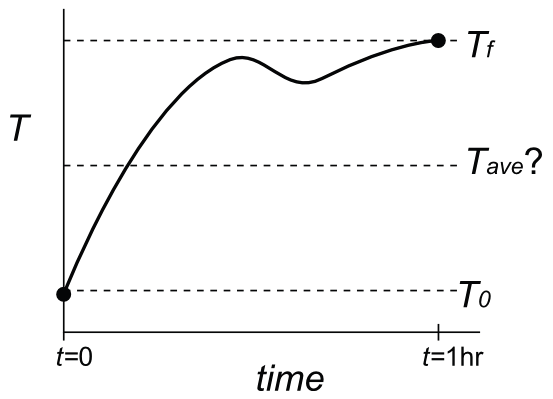

**Figure 4: Hypothetical situation where neither the final temperature, nor the average of initial and final temperatures gives an accurate representation of the temperature over the time step. This situation can be encountered in dynamic systems like CSP plants.**

To remedy this situation, System Advisor adjusts the total absorbed energy by subtracting the amount of energy that contributed to changing the energy state of the plant (i.e. the "transient energy"). The transient energy is calculated in Eq.[2.24].

$$\begin{array}{rcl}E_{trans}&=&\left(\overline{V}_{hdr,h}\;\rho_{hf,h}\;c_{ htf,h}+(mc)_{bal,h}\right)\;(T_{sys,h}-T_{sys,h,0})\\ &&+\left(\overline{V}_{hdr,c}\;\rho_{hf,c}\;c_{htf,c}\;c_{htf,c}+(mc)_{bal,c} \right)\;(T_{sys,c}-T_{sys,c,0})\\ &&+\sum_{i=1}^{N_{sca}}\left(A_{cs,i}\;L_{i}\;\rho_{htf,i}\;c_{htf,i}+L_{i}\;( mc)_{bal,sca,i}\right)\cdot(\overline{T}_{i}-\overline{T}_{i,0})\cdot N_{loops} \end{array} \tag{2.24}$$

Equation [2.24] consists of three parts; the first and second terms measure the energy that contributes to changing the "hot" and "cold" parts of the system, respectively (i.e. the header HTF volume and piping between the solar field and the power cycle), while the third term measures the energy contributing to changing the temperature of the HTF, piping, and insulation in the collector loops.

Included in the thermal inertia calculations are the hot and cold header volume plus supplemental runner pipe $\left(\overline{V}_{hdr}\right)$ and the user-specified thermal mass terms $(mc)_{bal,h}$ and $(mc)_{bal,c}$ described previously. The collector thermal inertia term represents the sum of HTF mass for all collectors in all loops, and is increased by the length-specific thermal inertia term $(mc)_{bal,sca,i}$ also discussed previously. The energy state is relative to the temperature from the previous time step - $\left(T_{sys,h,0}\right)$ for the hot header and $\left(T_{sys,c,0}\right)$ for the cold header.

The energy value calculated in Eq.[2.24] is subtracted from the total absorbed energy in the solar field to determine the total available energy from the solar field during the given time step. The mass flow rate is recalculated based on the energy available from the field.

$$\dot{m}_{A,sf}=\frac{\dot{q}_{A,sf}}{c_{htf,ave}\left(T_{sys,h}-T_{sf,in}\right)} \tag{2.25}$$

_Where:_

$$\dot{q}_{A,sf}=\dot{q}_{sf}-\frac{E_{trans}}{\Delta t}$$

The temperature $T_{sf,in}$ represents the inlet HTF temperature to the solar field and $T_{sys,h}$ is the return temperature to the power cycle calculated in Eq.[2.11]. The return temperature calculation presented in Eq. [2.11] uses the heat-loss adjusted loop outlet temperature rather than the temperature at the immediate outlet of the field loops. Thermal losses from the header and runner piping are accounted for as part of the loop outlet temperature by using the user-specified piping loss coefficient $\lambda_{hl}$ from the Parasities page and the total transport piping surface area $A_{pipe,tot}$ calculated by the model.

$$T_{loop,out}^{*}=T_{loop,out}-\frac{\lambda_{hl}\ A_{pipe,tot}\ \left(T_{loop,out}-T_{amb}\right)}{\dot{m}_{htf}\ c_{htf,ave}} \tag{2.26}$$

## 2.3 Collector Assembly and Field Optics

The collector model and optical calculations used in the physical trough model are based on the collector model in System Advisor's empirical trough model. System Advisor defines the collector as the portion of the solar field that reflects irradiation to the receiver. This equipment is distinct from the receiver component that consists of an evacuated glass envelope and tube receiver, as shown in Figure 5. The optical calculations for the collector model extend to the point of determining the magnitude of solar flux that is incident on the receiver.

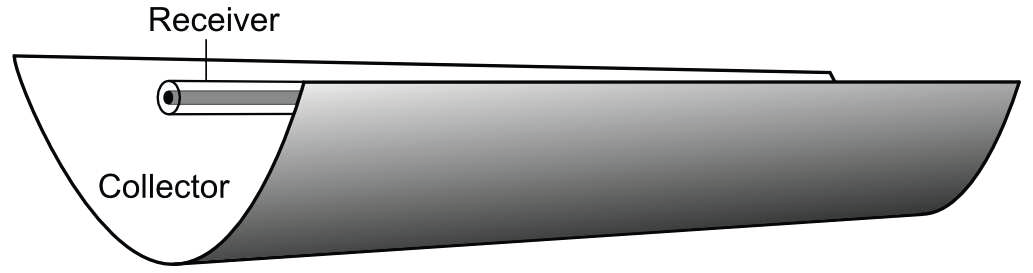

**Figure 5: The trough includes both a collector to reflect light and a receiver to absorb and transport heat.**

To determine the flux incident on the receiver, we must consider both constant optical losses and variable optical losses that change with solar position. The total irradiation on the field is a function of the equivalent aperture area of all of the collectors in the field, the strength of the solar insolation, and the angle at which the irradiation strikes the aperture plane. The equivalent aperture area refers to the total reflective area of the collectors that is projected on the plane of the collector aperture. This area is distinct from the curved reflective surface. Area that is lost due to gaps between mirror modules or non-reflective structural components is not included in the aperture area value. Thus, though the structure of the collector may occupy $100m$ lengthwise and $5m$ across the aperture, for example, the total reflective aperture area may be somewhat less than $100\times 5=500m^{2}$ after spaces, gaps, and structural area are accounted for.

When the solar irradiation is not normal to the plane of the collector aperture, losses are incurred that scale with the acuteness of incidence angle. The incidence angle $\theta$ is equal to the difference in angles between the normal to the aperture plane and the solar irradiation. This is depicted in Figure 6.

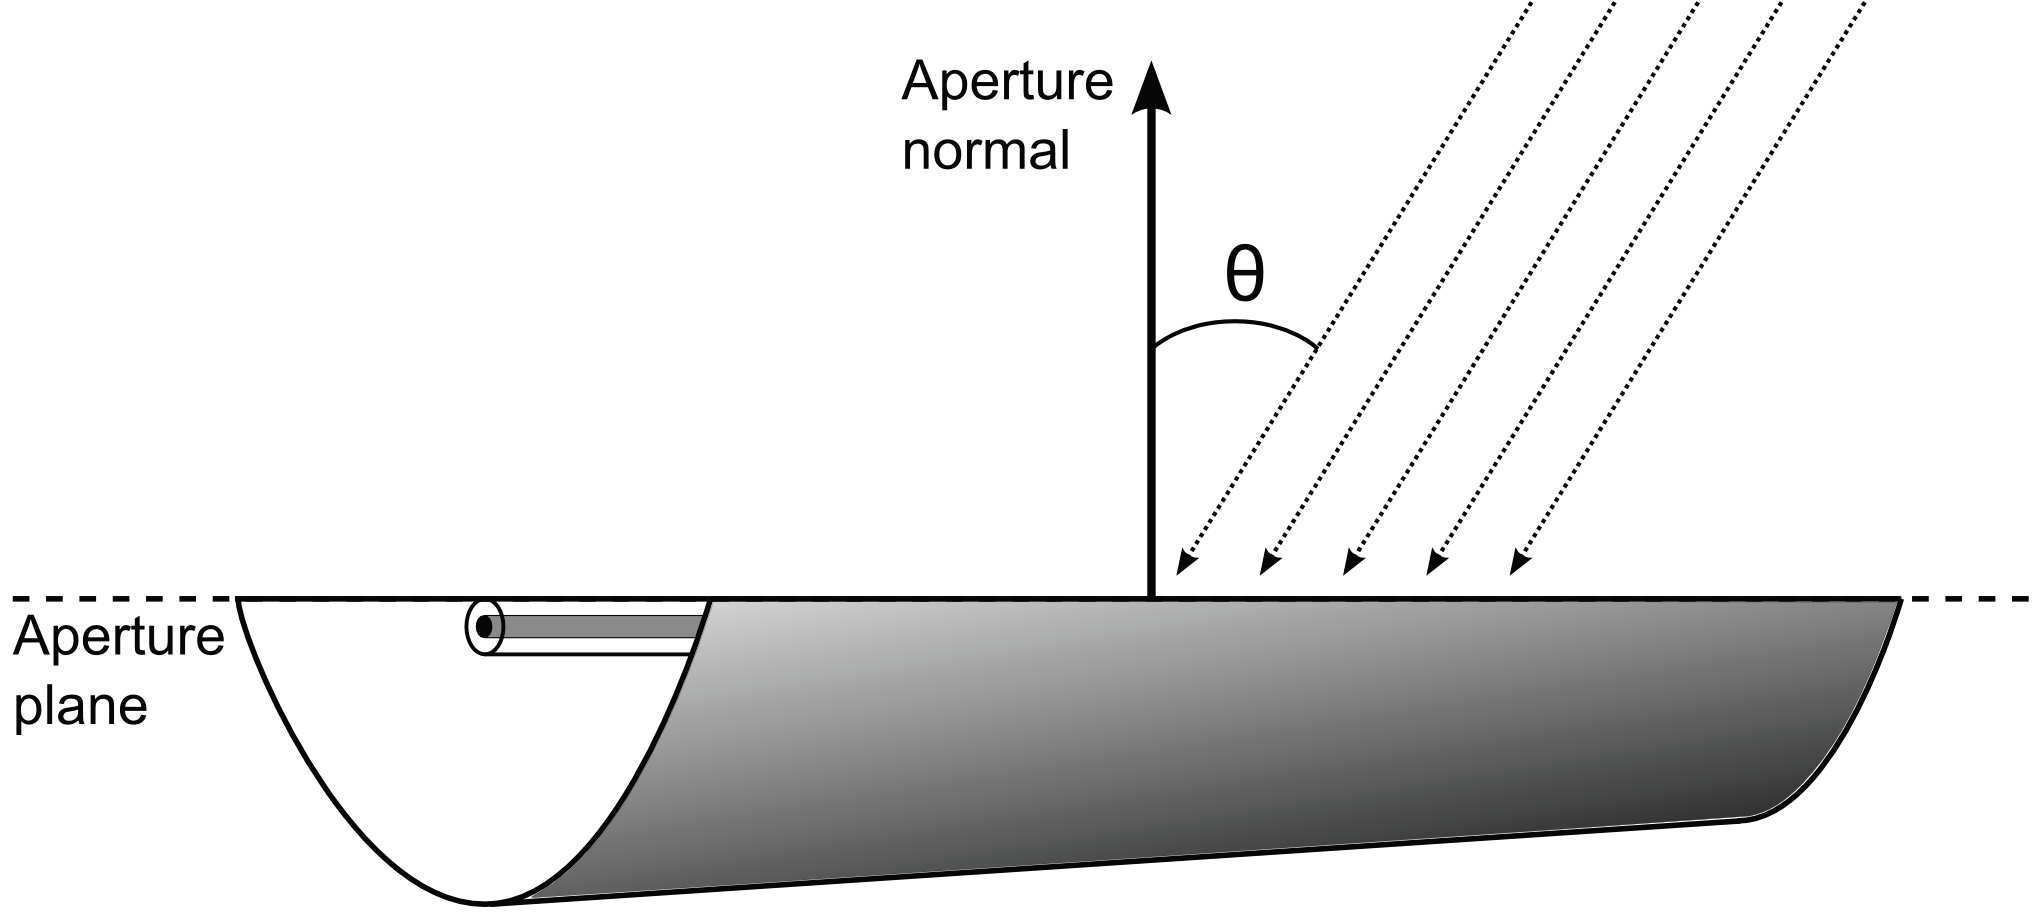

**Figure 6: The angle between the solar irradiation and the normal vector to the collector aperture plane.**

The incidence angle is a function of solar position and the collector tracking angle. To find the solar position for a particular plant at latitude $phi$ and longitude $psi$, we first calculate the solar time $t_{sol}$[5].

$$B = (day-1)\ \frac{360}{365}$$
$$EOT = 9.2\left (0.000075+0.001868\ \cos B - 0.032077\sin B - 0.014615\ \cos(2B)-0.04089\ \sin(2B)\right)$$
$$shift = zone\cdot 15-\psi$$
$$t_{sol} = hour+\frac{shift}{15}+\frac{EOT}{60} \tag{2.27}$$

_EOT_ is an equation of time that determines the deviation in local time from solar time as a function of the day of the year, \(shift\) represents the fixed time-shift in minutes due to the difference between the standard longitude for the time zone (_zone_, negative zones to the west and positive to the east of GMT+0) and the longitude at the location of interest. The day of the year _day_ and the hour of the day (_hour_, from 0 to 24) are also required. The time of day is converted into an hour angle ($\omega$) in Eq.[2.28].

$$\omega=(t_{sol}-12)\cdot 15^{\circ} \tag{2.28}$$

Since the solar position is impacted by the tilt of Earth's axis, the declination angle $\delta$ must also be determined.

$$\delta=23.45^{\circ}\cdot\sin\left(360\frac{(284+day)}{365}\right) \tag{2.29}$$

Finally, the solar azimuth ($\gamma_{sol}$) and the solar elevation ($\theta_{e}$) angles are calculated [5].

$$\theta_{e} = \sin^{-1}\left(\sin(\delta)\;\sin(\phi)+\cos(\phi)\;\cos(\delta)\; \cos(\omega)\right) \tag{2.30}$$
$$\theta_{z} = 90^{\circ}-\theta_{e}$$
$$\gamma_{sol} = sign(\omega)\left|\cos^{-1}\left(\frac{\cos(\theta_{z})\;\sin( \phi)-\sin(\delta)}{\sin(\theta_{z})\;\cos(\phi)}\right)\right| \tag{2.31}$$

The trough collector is capable of single-axis tracking about the lengthwise axis. This axis may be oriented in any compass direction, though it typically aligns in either the North-South or the East-West direction. The collector tracks the solar position in such a way that the angle between the aperture plane normal and the solar irradiation is minimized. The tracking angle $\omega_{col}$ is calculated in Eq.[2.32], where the collector orientation with an azimuth angle ($\gamma_{col}$) and a tilt angle ($\theta_{col}$) that is positive when the portion of the field closet to the equator is tilted up [19].

$$\omega_{col}=\tan^{-1}\left(\frac{\cos(\theta_{e})\;\sin(\gamma_{sol}-\gamma_ {col})}{\sin(\theta_{e}-\theta_{col})+\sin(\theta_{col})\;\cos(\theta_{e})\;(1 -\cos(\gamma_{sol}-\gamma_{col}))}\right) \tag{2.32}$$

All of the information needed to calculate $\theta$ has now been determined. Thus:

$$\theta=\cos^{-1}\sqrt{1-\left[\cos(\theta_{e}-\theta_{col})-\cos(\theta_{col}) \;\cos(\theta_{e})\;(1-\cos(\gamma_{sol}-\gamma_{col}))\right]^{2}} \tag{2.33}$$

The total radiation incident on the solar field is equal to the available beam-normal irradiation ($I_{bn}$) times the total aperture area, but is scaled by the cosine of $\theta$. Thus, this optical derate is referred to as "cosine loss" and it is the primary variable loss mechanism for the solar field.

Several other solar position losses are modeled, including spillage of reflected radiation off the end of the collector row, shadowing from one row to another, energy lost before deploying in the morning and after stowing in the evening while solar energy is still available, and an incident-angle modifier that accounts for all remaining position-dependent losses.

#### End spillage losses

During hours when incoming solar radiation is not directly normal to the collector aperture, some radiation is reflected off the end of the collector that doesn't reach the receiver. The end loss from each collector can be partially recovered by the adjacent collector, and this energy is calculated as the "end gain" in Eq. [2.35]. While all collectors incur some end loss, the collectors that benefit from end gain depend on the solar position as well as the position of the collector within the loop.

_For_ $i=1,N_{sca}$

$$\eta_{endLoss,i}=1-\frac{L_{f,ave,i}\ \tan(\theta)}{L_{i}}+\eta_{endGain,i} \tag{2.34}$$

_Where:_

$$\eta_{endGain,i}=\frac{L_{f,ave,i}\ \tan(\theta)-L_{sca,gap,i}}{L_{i}} \tag{2.35}$$

The $\eta_{endGain,i}$ term is equal to zero in the following circumstances:

1. The sun is in the southern sky6 and the collector in question is the southernmost of the collector row (e.g. $i=1$ or $i=N_{sca}$) Assuming a field in the northern hemisphere.
2. The sun is in the northern sky and the collector in question is the northernmost of the collector row (e.g. $i=\lfloor\frac{N_{sca}}{2}\rfloor$ or $i=\lfloor\frac{N_{sca}}{2}\rfloor+1$)

$L_{i}$ is the net total collector length, $L_{sca,gap,i}$ is the piping distance separating each SCA within a single row, and $L_{f,ave,i}$ is the average surface-to-focus path length from the System Advisor Collectors page. Note that the latter value is not the focal length of the parabola at the vertex, but instead is the total averaged value the light reflecting from the parabolic surface must travel to reach the focus for aperture-normal incidence. Often, only the focal length at the vertex is readily available, but the averaged value can be calculated using an integral approach, so long as the aperture width ($w$) is also known.

Beginning with the equation of a parabola $y=\frac{x^{2}}{4a}$ where $a$ is the focal length at the vertex, we can express the distance traveled from any point (x, y) on the parabola to the focus at (0,a). This arrangement is illustrated in Figure 7. Using the Pythagorean theorem with sides of length $x$ and $y-a$, the distance at point (x, y) is:

$$L_{f,(x,y)} = \sqrt{x^{2}+(y-a)^{2}}$$
$$= \sqrt{x^{2}+\left(\frac{x^{2}}{4a}-a\right)^{2}}$$

The average focal length is then the integral of $L_{f,(x,y)}$ with respect to $x$ over the aperture width $(-\frac{w}{2}\cdot+\frac{w}{2})$ and divided by the total aperture width.

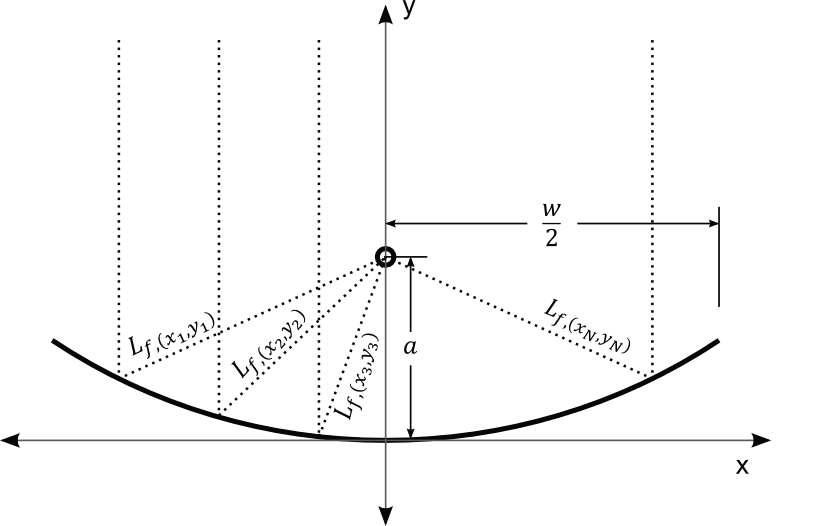

**Figure 7: Focal length geometry for calculating the average focal length.**

The shadowing effect is derived by considering the geometry of the two adjacent collector rows. Relating the two rows as shown in Figure 8, a right triangle is drawn with a hypotenuse equal to the centerline-to-centerline row spacing \(L_{spacing}\) and short side equal to the non-shadowed aperture width, $w_{a}$. To determine the fraction of active collector aperture, we first calculate the length of the non-shadowed aperture.

$$L_{f,ave} = \int_{-\frac{w}{2}}^{+\frac{w}{2}}\frac{\sqrt{x^{2}+\left(\frac{x^{ 2}}{4a}-a\right)^{2}}}{w}\,dx \tag{2.36}$$
$$= \sqrt{\frac{\left[4a^{2}+\left(\frac{w}{2}\right)^{2}\right]^{2}} {a^{2}}}\cdot\frac{12a^{2}+\left(\frac{w}{2}\right)^{2}}{12(4a^{2}+\left( \frac{w}{2}\right)^{2})}$$

Evaluation of the definite integral results in Eq.[2.36] above, and provides a simple expression for average focal length as a function of the focal distance and aperture width.

#### Row shadowing

Shadowing between rows generally occurs at extreme solar positions (i.e. dusk or dawn) when the shadow cast by a collector closer to the sun obscures a portion of an adjacent collector.

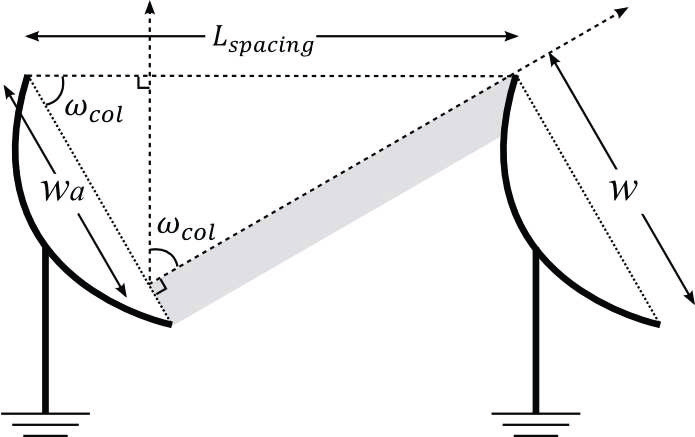

**Figure 8: Two adjacent collector rows may shadow each other if the tracking angle is sufficiently severe. The shadowing is subject to the collector aperture width, the row spacing (centerline to centerline), and the tracking angle of the collectors**

The shadowing effect is derived by considering the geometry of the two adjacent collector rows. Relating the two rows as shown in Figure 8, a right triangle is drawn with a hypotenuse equal to the centerline-to-centerline row spacing $L_{spacing}$ and short side equal to the non-shadowed aperture width, $w_{a}$. To determine the fraction of active collector aperture, we first calculate the length of the non-shadowed aperture.

$$w_{a}=\cos\left(\omega_{col}\right)\,L_{spacing} \tag{2.37}$$

The shadowing efficiency is equal to the ratio of the non-shadowed aperture to the total aperture width, $w$, as shown in Eq. [2.38]. The total shadowing efficiency is limited to the range of values between 0.5 and 1.0. If the shadowing efficiency is less than 0.5, the solar field is unlikely to operate successfully, so the total optical efficiency is set to zero and the simulation progresses to the next time step.

$$\eta_{shadow}=\frac{w_{a}}{w}=|\cos(\omega_{col})|\,\frac{L_{spacing}}{w} \tag{2.38}$$

### Stow and Deploy Angles

The user can enforce limits on when the solar field will track the sun. This is given in terms of the solar elevation angle, and can be specified for the deploy event and stow event separately.

Given a stow angle $\omega_{stow}$ and deploy angle $\omega_{deploy}$ that correspond to the solar elevation angle, the time of stow and deploy can be calculated using the same relationship.

$$t_{stow/deploy} = t_{noon}+\frac{sign(\tan(180^{\circ}-\omega))}{15}\cdot\cos^{-1} \left(\frac{c_{1}c_{2}+\sqrt{c_{1}^{2}-c_{2}^{2}+1}}{c_{1}^{2}+1}\right) \tag{2.39}$$
_where_
$$c_{1} = \frac{\cos(\phi)}{\tan(\omega)}$$
$$c_{2} = -\frac{\tan(\delta)\sin(\phi)}{\tan(\omega)}$$

For the stow or deploy time, $\omega=\omega_{stow}$ or $\omega=\omega_{deploy}$, respectively. Once the deploy and stow times have been calculated, the model calculates the fraction of the time step during with the system can operate.

_For the deploy hour:_

$$f_{track}=\frac{t_{\Delta t,end}-t_{deploy}}{\Delta t} \tag{2.40}$$

_For the stow hour:_

$$f_{track}=\frac{t_{\Delta t,start}-t_{stow}}{\Delta t} \tag{2.41}$$

The times at the beginning and end of the time step are given as $t_{\Delta t,start}$ and $t_{\Delta t,end}$, respectively. The fraction is limited by the model to fall between 0 and 1 during non-startup/shutdown time steps.

#### Incident Angle Modifier

The incident angle modifier $\eta_{IAM}$ is aerate factor that accounts for collector aperture foreshortening, glass envelope transmittance, selective surface absorption, and any other losses that are a function of solar position. The incident angle modifier factor is calculated using an empirical formula of the form in Eq. [2.42]. The default coefficients for this equation were derived from the field tests of the SEGS LS2 collectors [4]. Equation coefficients $a_{0}$, $a_{1}$, and $a_{2}$ are specified as inputs on the Collectors page.

$$\eta_{IAM}=a_{0}+a_{1}\frac{\theta}{\cos\theta}+a_{2}\frac{\theta^{2}}{\cos\theta} \tag{2.42}$$

($\theta$ in radians)

#### Constant optical derate factors

The trough collector model captures optical efficiency with losses that are a function of solar position and with fixed losses that are applied as constant multipliers. Fixed losses include tracking error, geometry defects, mirror reflectance, mirror soiling, and general error not captured by the other items. Because the model multiplies the loss factors together to calculate an overall loss factor, the value of each individual loss factor is not as important as the value of the product of all of the losses. Table 4 describes the physical effect each loss factor is intended to represent.

**Table 4: General definitions for each fixed optical loss term**

| Error Description |Term | Definition |
|---|---|---|
| Tracking error | $\eta_{track}$ | Inability of the collector to perfectly orient along the tracking angle; twisting of the collector about the lengthwise axis |
| Geometry defects | $\eta_{geo}$ | Poor alignment of the mirror modules; deviation in the position of the receiver tube from the optical focus; warping or discontinuities along the reflective surface |
| Mirror Reflectance | $\rho_{m}$ | Specular reflectance within a cone angle defined by the collector and receiver geometry |
| Mirror soiling | $\eta_{soil}$ | Dirt or soiling on the reflective surface that prevents irradiation from reflecting to the receiver |
| General Error | $\eta_{gen}$ | Any effect not captured within the previous categories |

The total optical efficiency is defined in Eq.[2.43], and we finally calculate the total radiative energy incident on the solar field in Eq.[2.44].

$$\eta_{opt}(\theta,\omega_{col})=\eta_{endLoss}(\theta)\;\eta_{shadow}(\omega_{ col})\;\eta_{IAM}(\theta)\;\eta_{track}\;\eta_{geo}\;\rho_{m}\;\eta_{soil}\;\eta_{gen} \tag{2.43}$$

$$\dot{q}_{inc,sf}=I_{bn}\;A_{ap,tot}\;\eta_{opt}(\theta,\omega_{col}) \tag{2.44}$$

The incident energy may be adjusted, depending on the stow and deploy times calculated above. For situations where the deploy or stow event occurs part way through a time step, the collector efficiency is reduced by the fraction of time step not in operation. For example, if the solar field deploys at 7:45am (solar time), the fraction of the time step spent tracking ($f_{track}$) is multiplied by the total collector optical efficiency. In this case, $f_{track}=1-45/60$, or $0.25$.

### 2.3.1 Determining an average efficiency value

System Advisor allows the user to assign multiple collector types and geometries within the same SCA loop (see the Solar Field page). Since each collector variation may have a unique optical efficiency, the reported collector efficiency in the simulation output is equal to the weighted average of all of the collectors used in the loop. System Advisor calculates the weighted optical efficiency by determining the total aperture area of the loop, then multiplying each collector's efficiency value by it's relative share of the loop aperture. Mathematically, this is represented in Eq.[2.45] for $i$ collector assemblies in the loop, each with unique area $A_{col,i}$ and efficiency $\eta_{col,i}$.

$$\eta_{col,ave}=\sum_{i=1}^{N_{sca}}\eta_{col,i}\cdot\frac{A_{col,i}}{A_{loop, tot}} \tag{2.45}$$

* The collector field model determines the incoming solar flux by considering weather data, plant location, solar position, anderate values that are both constants and functions of solar/collector position.
* Variable losses modeled are end spillage, row shadowing, stow and deploy events, and the incident angle modifier.
* Constant loss fractions account for tracking error, geometry defects, mirror reflectance, mirror soiling, and general error.

### _Receivers (HCE's)_

The receiver formulation used in the physical trough model uses a 1-dimensional model developed in [8]. Forristall's work uses the Engineering Equation Solver (EES) package [15] that is designed to evaluate complex systems of equations using an iterative approach. The system of equations describe the relationship between temperature and heat loss: The surface temperature of the absorber tube is a function of the heat absorption, while convective and radiative losses are strong functions of surface temperature. Convective loss is directly proportional to the difference between receiver surface and ambient temperatures, and radiation loss is proportional to temperature difference to the fourth power. The performance of the receiver can't be accurately modeled using simple explicit relationships. Instead, System Advisor uses implicit equations, solving iteratively with successive substitution until the solution converges.

The receiver is modeled as a 1-dimensional energy flow. Only the temperature gradient in the radial direction is assumed to be significant - axial and circumferential heat transfer are neglected. Figure 9 presents a diagram of one quarter of the receiver in cross-section. Each temperature $T_{1-5}$ is calculated by the model using an energy balance and temperature-dependent loss coefficients. The receiver geometry is specified by the user with radii $R_{1-4}$.

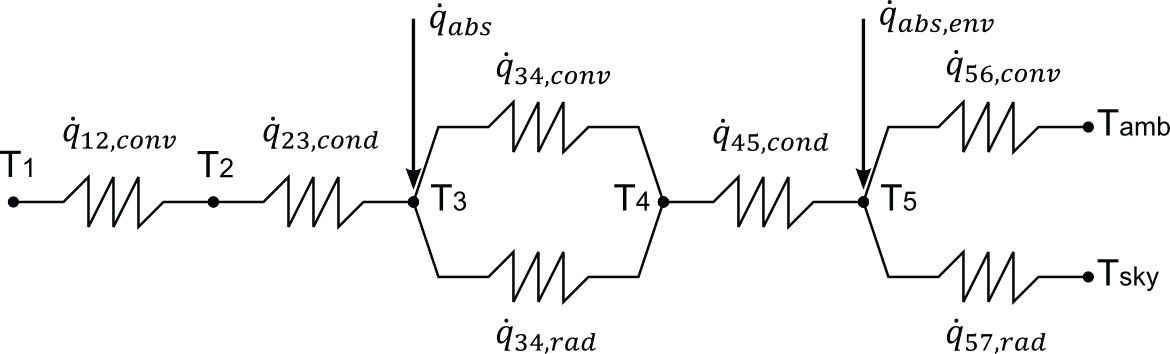

**Figure 9: A heat balance for the modeled receiver. Heat transfer in the radial direction (left to right) is considered, while circumferential and axial transfer is not.**

Concentrated irradiative flux from the collector passes through the transparent glass envelope ($R_{3-4}$), and a portion of that flux is absorbed by the glass. The absorbed flux is determined from the absorption fraction specified by the user as Envelope Absorptance ($\alpha_{em}$) on the Receivers page and influences the calculated temperature of the glass. The flux that passes through the glass envelope reaches the absorber tube at $R_{2}$. Note that the fraction of energy passing through the glass envelope is specified by the Envelope Transmittance value on the Receivers page, and need not equal the compliment of the absorptance value. This is because absorptance by the glass is only one of several possible loss mechanisms. Others include reflective loss and light refraction where incoming rays are bent away from the absorber.

During operation, the heated surface at $R_{2}$ drives thermal energy through the absorber wall ($R_{1-2}$) and into the cooler HTF. Thermal losses from the absorber surface occur via convection and radiation exchange with the glass envelope. The glass envelope is in turn exposed to ambient air. Figure 10 shows the heat transfer network, conceptualized as a set of thermal resistances in series and parallel. This is analogous to an electrical resistance network where thermal energy represents current, thermal resistance represents electrical resistance, and temperature drop is equivalent to voltage drop. Incidentally, the same resistance formulae apply to thermal and electrical networks.

#### 2.4.1 Modeling approach

The nodal nature of the collector loop was discussed in Section 2.1 (see Figure 2 on page 2). To summarize, each node corresponds to an assembly of individual receiver elements and collector modules. As HTF passes through the loop, it gradually warms until it reaches the design-point field outlet temperature at the end of the last SCA. The gradual warming of HTF over the length of the loop corresponds to a trend of decreasing thermal efficiency, since receiver performance is inversely related to receiver temperature. Variability in receiver performance within a loop can be significant, so the receiver model is applied individually for each node in the loop. This system is solved iteratively to determine the mass flow rate that is required to meet the design outlet temperature, as discussed in Section 2.2.

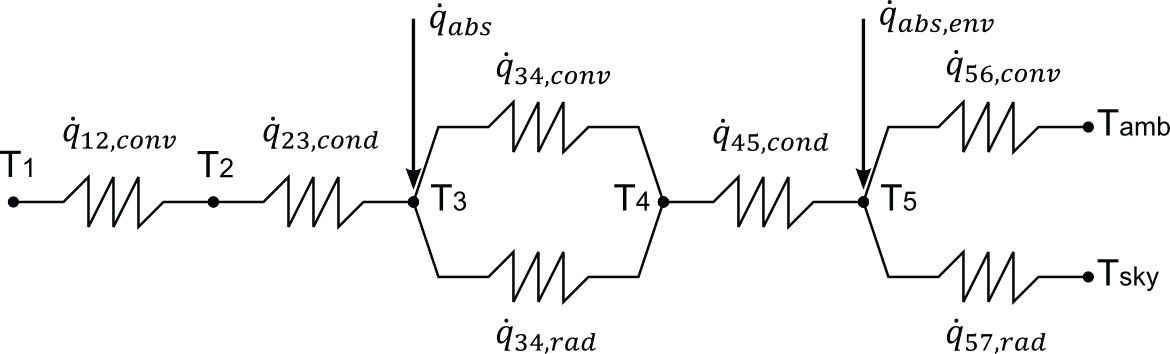

**Figure 10: The thermal resistance network for the “intact” receiver model shown in Figure 9. Energy is absorbed at $T_{3}$ and $T_{4-5}$.**

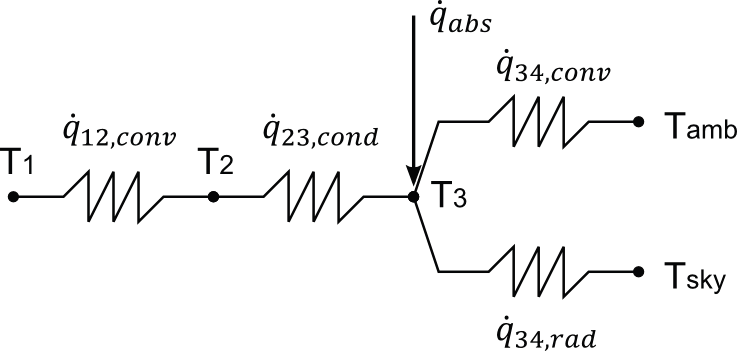

**Figure 11: The thermal resistance network for the “broken glass” receiver model. Energy is absorbed on the absorber tube surface at $T_{3}$ and heat is exchanged directly with the sky and ambient temperatures.**

The receiver model uses information about the HTF temperature, receiver geometry, ambient conditions, and incoming solar flux to determine the performance of the receiver. Conceptually, the solar field can be dissected into four different models:

1. the collector model
2. the receiver model
3. the piping model, and
4. the HTF model.

This distinction is particularly noteworthy for the receiver and HTF models. The HTF model calculates the HTF temperature throughout the loop based on absorbed energy and mass flow rate. The receiver model calculates the thermal performance of the receiver given an HTF temperature and other information. Thus, from the perspective of the receiver model, the HTF temperature ($T_{1}$) is an input value even though $T_{1}$ is closely tied to the results calculated by the receiver model. Other specified values for the model are summarized in Table 5.

**Table5: Inputs to the receiver model**

| **Item**         | **Description**                            |
|------------------|--------------------------------------------|
| $T_{1}$        | HTF inlet temperature                      |
| $\dot{m}_{inf}$| HTF mass flow rate                         |
| $T_{amb}$      | Ambient temperature                        |
| $T_{sky}$      | Effective sky temperature                  |
| $v_{wind}$     | Wind velocity at the receiver surface      |
| $p_{amb}$      | Ambient pressure                           |
| $\dot{q}_{inc,i}$ | Incident radiation at node $i$        |
| $A_{cs}$       | Cross-sectional area of the absorber tube  |
| $D_{2}$        | Absorber tube internal diameter             |
| $D_{3}$        | Absorber tube external diameter             |
| $D_{4}$        | Glass envelope internal diameter            |
| $D_{5}$        | Glass envelope external diameter            |
| $D_{p}$        | Internal flow plug diameter                 |
| $\epsilon_{3}$ | Absorber surface emittance                 |
| $\epsilon_{4}$ | Glass surface emittance                    |
| $\alpha_{abs}$ | Absorber surface absorptance                |
| $\alpha_{env}$ | Glass envelope absorptance                  |
| $\eta_{col,i}$ | Collector optical efficiency at node $i$  |
| $\tau_{env}$   | Glass envelope transmittance                |
| $P_{a}$        | Annulus pressure                           |
| -                | Annulus gas type                           |
| -                | HTF type                                   |
| -                | Absorber material                          |


For any solver using successive substitution, initial guess values must also be provided. The guess values for the receiver model are initially calculated based on the HTF temperature provided to the model, and depend on the condition of the receiver envelope. Temperature guesses for the absorber tube and glass envelope must be provided. Eq.[2.46] shows the initial settings for the temperatures for intact receivers, and Eq.[2.47] shows the settings for receivers with broken glass.

$$T_{2} = T_{1}+2^{\circ}C$$
$$T_{3} = T_{2}+5^{\circ}C \tag{2.46}$$
$$T_{4} = T_{3}-0.8\cdot(T_{3}-T_{amb})$$
$$T_{5} = T_{4}-2^{\circ}C$$
$$T_{2} = T_{1}+2^{\circ}C$$
$$T_{3} = T_{2}+5^{\circ}C \tag{2.47}$$
$$T_{5} = T_{4}=T_{amb}$$

Once guess values have been calculated, subsequent calls to the subroutine use the converged values from the previous call as the new guess values. However, several conditions may trigger recalculation of the guess values using Eq.'s[2.46] and [2.47]:

* The difference between the last $T_{1}$ and the current $T_{1}$ is greater than $50^{\circ}C$
* The minimum value in the group $T_{1-5}$ is less than the current $T_{sky}$ value
* Any temperature from the last call returned as invalid (Not a Number error)

### 2.4.2 Model formulation

The first step in determining receiver heat loss is to calculate the thermal resistance between the outer absorber tube and the inner glass envelope surfaces. Both convection and radiation contribute to the total heat transfer, though convection between the two surfaces is very small for intact receivers. Convection becomes significant in cases where the vacuum is lost due to broken glass or where hydrogen from the HTF has diffused through the absorber tube wall into the annulus.

#### Convection from the absorber

Convection may occur either between the absorber and the inner glass surface or directly to the ambient air in the case that the envelope is broken. The convection subroutine handles both situations. First, for **intact receivers**, the annulus gas properties are evaluated at the average temperature $T_{34}$. Convection from $R_{3}$ to $R_{4}$ can be generally expressed in terms of thermal resistance $\hat{R}_{34,conv}$ as7:

$$\dot{q}_{34,conv}=\frac{T_{3}-T_{4}}{\hat{R}_{34,conv}} \tag{2.48}$$

_Where:_

$$\hat{R}_{34,conv}=\frac{1}{\gamma_{34,conv}\,\pi\,D_{3}}$$

$$\hat{R}_{34,conv}=\frac{1}{\gamma_{34,conv}\,\pi\,D_{3}}$$

The receiver model calculates natural internal convection using the modified Raithby and Hollands correlation [2] (for more information on the convective algorithms, see [8] pages 11-14). The calculation for annular natural convection begins with determining the Rayleigh number at diameter $$D_{3}$$ using Eq.[2.49].

$$Ra_{D3}=\frac{g\,\beta_{34}\,|T_{3}-T_{4}|\,D_{3}^{3}}{\alpha_{34}\,\,\nu_{34}} \tag{2.49}$$

The volumetric expansion coefficient $\beta_{34}$, the thermal diffusivity constant $\alpha_{34}$, and the kinematic viscosity $\nu_{34}$ of the annular gas are all evaluated at the averaged temperature $T_{34}$.

Using Prandtl number $Pr_{34}=\nu_{34}/\alpha_{34}$, we calculate the heat transfer due to natural convection in the annulus and the associated heat transfer coefficient.

$$\dot{q}_{34,conv} = 2.425\;k_{34}\;\frac{T_{3}-T_{4}}{\left(1+\frac{D_{3}}{D_{4}}^{0.6 }\right)^{1.25}}\;\left(\frac{Pr_{34}Ra_{D3}}{0.861+Pr_{34}}\right)^{0.25} \tag{2.50}$$
$$\gamma_{34,conv} = \frac{\dot{q}_{34,conv}}{\pi\,D_{3}\;(T_{3}-T_{4})} \tag{2.51}$$

For very low annular pressures, the molecular density drops below the physical limit for establishing convective currents; instead, free molecular heat transfer relationships more appropriately describe convective heat loss. The receiver model handles this by using the largest convective loss predicted by either annular natural convection or free molecular heat transfer. Eq.[2.52] shows the steps for calculating free molecular heat transfer.

$$\Lambda = C_{1}\times 10^{-20}\cdot\frac{T_{34}}{P_{a}\cdot\zeta^{2}}$$
$$\Gamma = \frac{c_{p,34}}{c_{v,34}}$$
$$b = \frac{9\Gamma-5}{2\Gamma+2}$$
$$\gamma_{34,conv} = \frac{k_{34}}{\frac{D_{3}}{2}\log\left(\frac{D_{4}}{D_{3}} \right)+\frac{b\,\Lambda}{100}\;\left(\frac{D_{3}}{D_{4}}+1\right)} \tag{2.52}$$
$$\dot{q}_{34,conv} = \pi\,D_{3}\;\gamma_{34,conv}\;(T_{3}-T_{4})$$

In the calculation for $\Lambda$, $C_{1}$ is a constant $2.331\times 10^{-20\,\frac{mmHg\cdot cm^{3}}{K}}$, $\zeta$ is the free-molecular collision distance shown in Table 6[8], and $P_{a}$ is the annulus pressure in $torr$.

**Table 6: Values of the mean free path between collisions of a molecule for free molecular convection**
| **Annulus Gas** | $\zeta$ **[cm]**  |
|-----------------|---------------------|
| _Air_           | $3.53 \times 10^{-8}$ |
| _Hydrogen_      | $2.4 \times 10^{-8}$  |
| _Argon_         | $3.8 \times 10^{-8}$  |


The annular convection calculations assume that the receiver's glass envelope is intact.

However, the glass envelope sometimes breaks due to impact or excessive thermal cycling. Thermal loss from a **broken-glass receiver** is significantly higher than for an intact receiver, and the loss must be modeled differently. System Advisor provides specialized calculations for broken-glass receivers and further divides the heat transfer relationships applied based on ambient wind speed.

If the ambient wind speed is very low (less than $0.1 \frac{m}{s}$), then the Nusselt number is calculated using the Churchill & Chu correlation for a long isothermal horizontal cylinder [13], where the fluid properties are determined at the averaged temperature $T_{36}$.

$$\overline{Nu}=\left[\frac{0.60+0.387\cdot Ra_{D3}^{0.1667}}{\left(1+\left(\frac {0.559}{Pr_{36}}\right)^{0.5625}\right)^{0.2963}}\right]^{2} \tag{2.53}$$

The convection coefficient calculated in Eq.[2.54] is then used to determine the total convective heat transfer.

$$\gamma_{34,conv} = \overline{Nu}\,\frac{k_{36}}{D_{3}} \tag{2.54}$$
$$\dot{q}_{34,conv} = \gamma_{34,conv}\,\pi\,D_{3}\,\left(T_{3}-T_{6}\right)$$

If the ambient wind speed is above $0.1 \frac{m}{s}$, thermal properties are required for both the air in contact with the absorber surface at $T_{3}$ and the ambient air at $T_{6}$. In this case, the Nusselt number is calculated using Zhukauskas' correlation for external forced convection [13].

$$\overline{Nu}=C\,\,Re_{D3}^{m}\,\,Pr_{6}^{n}\,\,\left(\frac{Pr_{6}}{Pr_{3}} \right)^{0.25} \tag{2.55}$$

_Where:_

$$Re_{D3}=\frac{v_{6}\,D_{3}}{v_{6}}$$

The coefficients $m$, $n$, and $C$ are selected according to the Prandtl number and the Reynolds number as shown in Table 7. For $Pr\leq 10$, $n=0.37$, otherwise $n=0.36$.

|  **Reynolds Number Range** | **C** | **m** |
|---|---|---|
| $0 \leq Re_{D3} < 40$ | 0.75 | 0.4  |
| $40\leq Re_{D3} < 1000$ | 0.51 | 0.5  |
| $1000 \leq Re_{D3} <2\times 10^{5}$ | 0.26 | 0.6  |
| $2 \times 10^{5} \leq Re_{D3} < 10^{6}$ | 0.076 | 0.7 |

**Table 7: Selection of coefficients $C$ and $m$ for Zhukauskas’ correlation based on the Reynolds number at $D_{3}$.**

To summarize the absorber convection calculations:

1. Convection loss is determined based on the condition of the receiver (whether the glass envelope is intact or broken).
2. If the glass is intact, the natural convection coefficient and the molecular diffusion convection coefficient are both calculated and compared, with the larger of the two selected for use in the loss equation.
3. If the envelope is not intact, direct convection to ambient is calculated based on whether the wind speed is below or above $0.1 \frac{m}{s}$.

No matter the method used to calculate the convective loss coefficient from the absorber, the thermal resistance due to convection is expressed as follows.

$$\hat{R}_{34,conv}=\frac{1}{\gamma_{34,conv}\,\pi\,D_{3}} \tag{2.56}$$

#### Radiation from the absorber

Radiation loss from the absorber tube to the surroundings is the most significant contributor to heat loss for intact collectors. Two alternate equations are used for calculating radiative loss depending on whether the glass envelope is intact. For **intact receivers**, radiative exchange is between the absorber surface at $D_{3}$ and the inner envelope surface at $D_{4}$, as shown in Eq.[2.57].

$$\gamma_{34,rad} = \sigma(T_{3}^{2}+T_{4}^{2})\,\,\frac{T_{3}+T_{4}}{\frac{1}{ \varepsilon_{3}}+\frac{D_{3}}{D_{4}}\left(\frac{1}{\varepsilon_{4}}-1\right)} \tag{2.57}$$
$$\dot{q}_{34,rad} = \pi\,D_{3}\,\gamma_{34,rad}\,\,(T_{3}-T_{4})$$

If the receiver **envelope is broken**, radiation exchange occurs directly between the absorber surface and the ambient surroundings at temperature $T_{sky}$.

$$\dot{q}_{34,rad}=\sigma\,\gamma_{34,rad}\,\epsilon_{3}\,\,\pi\,D_{3}\,\,(T_{3} ^{4}-T_{sky}^{4}) \tag{2.58}$$

_Where:_

$$\gamma_{34,rad}=\frac{\dot{q}_{34,rad}}{\pi\,D_{3}\,\,(T_{3}-T_{7})}$$

The radiation thermal resistance $\hat{R}_{34,conv}$ is calculated with the same arrangement used in Eq.[2.56] above. The total thermal resistance between the absorber surface and the glass envelope is expressed as two parallel thermal resistances and applies only for intact receivers.

$$\hat{R}_{34,tot}=\left(\frac{1}{\hat{R}_{34,conv}}+\frac{1}{\hat{R}_{34,rad}} \right)^{-1} \tag{2.59}$$

#### Conduction across the glass envelope

Conduction across the intact glass envelope is modeled using the formula for radial resistance in a cylinder [17], assuming the thermal conductance $k_{45}=1.04\frac{W}{m-K}$.

$$\hat{R}_{45,cond}=\frac{\log\left(\frac{D_{5}}{D_{4}}\right)}{2\pi k_{45}} \tag{2.60}$$

#### Convection and radiation loss from the envelope

Like convection from the absorber to ambient air in the case of broken glass receivers, convection loss from the glass envelope occurs between a cylindrical object and free-stream air. Thus, the equations developed for convective loss from broken receivers can be reused here. For wind speeds of less than $0.1 \frac{m}{s}$, the Churchill and Chu correlation in

Eqs.[2.53-2.54] is used, otherwise Eq.[2.55] is used. Air properties are evaluated at $T_{5}$ and $T_{6}$ rather than at $T_{3}$ and $T_{6}$.

Radiative loss is calculated using Eq.[2.58], substituting $T_{5}$ for $T_{3}$. The corresponding thermal resistances are:

$$\hat{R}_{56,conv} = \frac{1}{\gamma_{56,conv}\,\pi\,D_{5}} \tag{2.61}$$
$$\hat{R}_{57,rad} = \frac{1}{\gamma_{57,rad}\,\pi\,D_{5}} \tag{2.62}$$

### Heat flows and temperatures

Thermal energy is absorbed into the resistance network at two locations, as illustrated in Figure 10 above. The absorber tube receives most of the thermal energy incident on the receiver at $D_{3}$, but a small portion of the incoming energy is also absorbed in the glass envelope at $D_{5}$.

The energy absorbed by absorber tube $i$ is a function of the energy concentrated by the $\dot{q}_{inc,i}$, the envelope transmittance $\tau_{env}$, and the absorber surface absorptance $\alpha_{abs}$.

$$\dot{q}_{abs,i}=\dot{q}_{inc,i}\,\eta_{opt,i}\,\tau_{env}\,\alpha_{abs} \tag{2.63}$$

The energy absorbed by the envelope is:

$$\dot{q}_{abs,env,i}=\dot{q}_{inc,i}\,\eta_{opt,i}\,\alpha_{env} \tag{2.64}$$

We estimate the heat transfer from the absorber surface to the inner envelope surface using the temperature guess values in Eq.[2.46] for $T_{3}$ and $T_{4}$. This heat flow ($\dot{q}_{34,tot}$) is increased by the energy absorbed within the envelope. For simplicity, the energy is assumed to be absorbed just after the inner envelope wall between $D_{4}$ and $D_{5}$ so that the thermal energy must travel the entire distance between the envelope walls. Thus, the thermal energy conducted across thewall is expressed as:

$$\dot{q}_{45,cond}=\dot{q}_{34,tot}+\dot{q}_{abs,env} \tag{2.65}$$

The outer envelope surface temperature is then the inner surface temperature minus the heat flow conducted scaled by the thermal resistance.

$$T_{5}=T_{4}-\dot{q}_{45,cond}\ \hat{R}_{45,cond} \tag{2.66}$$

Thermal losses from the envelope to ambient are now redetermined for this iteration with the newly recalculated glass envelope outer surface temperature $T_{5}$.

$$\dot{q}_{56,com} = \frac{T_{5}-T_{amb}}{\hat{R}_{56,com}} \tag{2.67}$$
$$\dot{q}_{57,rad} = \frac{T_{5}-T_{sky}}{\hat{R}_{57,rad}}$$

This fully defines the thermal resistance network from the outer absorber surface to the surroundings. If we consider the temperature profile of an intact receiver during operation, the figurative "top of the temperature hill" is located at the boundary between the absorber surface and the inner annulus ($D_{3}$). Heat always flows "downhill"; assuming we know the temperature at $D_{3}$, we can now recalculate the magnitude of the heat flow from the absorber to ambient. This quantity defines the receiver heat loss. This can be done analytically by expressing the total heat loss in terms of the equivalent thermal resistance between $D_{3}$ and ambient, and the total temperature difference between $T_{3}$ and the ambient temperatures $T_{amb}$ and $T_{sky}$. The heat conducted across the glass envelope is equal to the heat flow across the annulus ($\dot{q}_{34,tot}$) plus the heat absorbed directly by the envelope. This total heat flow is then radiated/convected to ambient, though the practical receiver heat loss is only equal to the heat transferred away from the absorber tube across the annulus, and the envelope energy absorption is accounted for an an optical loss. Thus:

$$\dot{q}_{hl}=\dot{q}_{34,tot}=\dot{q}_{45,cond}=\left(\dot{q}_{56,conv}+\dot{q }_{57,rad}-\dot{q}_{abs,env}\right)=\frac{\Delta T_{hl}}{\hat{R}_{3,amb}} \tag{2.68}$$

A practical implementation of this equation is easily derived by applying resistance network rules to the section of Figure 10 between $T_{3}$ and the ambient temperatures. Eq.[2.68] is then equivalently:

$$\dot{q}_{hl}=\frac{(T_{3}-T_{amb})\ \hat{R}_{57,rad}+(T_{3}-T_{sky})\ \hat{R}_{56,com}-\dot{q}_{abs,env}\ \Omega_{\hat{R}}}{\hat{R}_{34,tot}\ \hat{R}_{57,rad}+\hat{R}_{34,tot}\ \hat{R}_{56,com}+\Omega_{\hat{R}}} \tag{2.69}$$

_Where:_

$$\Omega_{\hat{R}}=\hat{R}_{56,conv}\ \hat{R}_{57,rad}+\hat{R}_{45,cond}\ \hat{R}_{57,rad}+\hat{R}_{45,cond}\ \hat{R}_{56,conv}$$

This equation is somewhat simplified as the envelope resistances drop out in the case that the receiver glass is removed and the absorber surface is in direct thermal communication with the ambient.

$$\dot{q}_{hl}=(T_{3}-T_{6})\ \hat{R}_{34,conv}+(T_{3}-T_{7})\ \hat{R}_{34,rad} \tag{2.70}$$

Having considered convective and radiative losses from the receiver for both intact and broken receivers, one remaining heat loss mechanism must be accounted for. This is conductive loss from the support brackets in contact with the receiver ends. Radiation and convection heat losses tend to overwhelm bracket conduction heat loss, so the System Advisor interface excludes inputs related to this loss. System Advisor hard-codes the required inputs for this calculation to reduce the number of user input variables. Table [8] enumerates the bracket geometry and material properties assumed by System Advisor.

**Table 8: Bracket geometry and material properties assumed by System Advisor for conductive heat loss calculations**

| **Item**                                   | **Assumed Value** | **Units**        |
|--------------------------------------------|-------------------|------------------|
| Effective bracket perimeter                | 20.32             | cm               |
| Effective bracket diameter                 | 5.08              | cm               |
| Minimum bracket cross sectional area       | $1.6129 \times 10^{-4}$ | $m^{2}$  |
| Conduction coefficient (carbon steel, 600K)| 48.0              | $\frac{W}{m-K}$|
| Effective bracket base temperature         | $T_{3}-10$      | ${}^{\circ}C$  |
| Single receiver length                     | 4.06              | m                |


Bracket heat loss is estimated by assuming that the bracket convects heat to the surroundings at a driving temperature difference of $T_{brac}-T_{amb}$, where the average bracket temperature $T_{brac}$ is defined as:

$$T_{brac}=\frac{1}{2}\left[\frac{T_{base}+T_{amb}}{2}+T_{amb}\right] \tag{2.71}$$

The base temperature $T_{base}$ is the effective bracket base temperature from Table 8. Like convection from the outer glass envelope, convection from the bracket is subdivided into still-air convection (velocity less than 0.1 m/s) and forced convection. The Nusselt number for natural convection is given in Eq.[2.53] as shown above, except using Rayleigh and Prandtl numbers corresponding to the average bracket temperature. The convective heat loss coefficient is then scaled by the effective bracket diameter.

$$\gamma_{brac}=\overline{Nu_{brac}}\ \frac{k_{brac}}{D_{brac}} \tag{2.72}$$

Forced convection from the bracket is calculated analogously to the procedure described in Eq.[2.55] and Table 7, but using bracket temperatures. The bracket convective heat loss calculation uses either the coefficient for forced convection or for natural convection, depending on the ambient wind speed. This coefficient $\gamma_{brac}$ is used to calculate the heat loss as shown in Eq.[2.73] for a given bracket perimeter $per_{brac}$, cross-sectional area $A_{brac,cs}$, and single receiver length $L_{rec}$.

$$\dot{q}_{brac}=\sqrt{\gamma_{brac}\;per_{brac}\;k_{brac}\;A_{brac,cs}}\;\left( \frac{T_{base}-T_{6}}{L_{rec}}\right) \tag{2.73}$$

The total heat loss from the receiver is the sum of convection, radiation, and bracket conduction losses. The energy flow into the HTF $\dot{q}_{12,conv}$ is then equal to the energy absorbed by the absorber tube minus the heat loss from the receiver. The heat loss value is reduced by the amount of heat absorbed in the glass envelope that also must be rejected; this avoids double-counting the heat loss from the absorber tube.

$$\dot{q}_{12,conv}=\dot{q}_{23,cond}=\dot{q}_{abs}-\dot{q}_{hl} \tag{2.74}$$

Using the calculated value for heat flow into the HTF and the guessed average HTF temperature $T_{1}$, we calculate the temperature drop from the inner absorber tube surface to the HTF due to the internal convective resistance. The convection correlations require fluid properties evaluated at the inner wall temperature and the bulk HTF temperature, and are divided into several cases: for HTF flow velocities greater than 0.1 m/s, the Nusselt number is calculated for either annular or round-pipe flow, and for higher velocities the Nusselt number is determined using a modified Gnielinski correlation [11]. For low velocities with annular flow:

$$\overline{Nu}_{12} = 41.402\;D_{R}^{5}-109.702\;D_{R}^{4}+104.570\;D_{R}^{3}-42.979\;D _{R}^{2} \tag{2.75}$$
$$+\;7.686\;D_{R}+4.411$$

_Where:_

$$D_{R}=\frac{D_{P}}{D_{2}}$$

and for low velocities with normal pipe flow, the Nusselt number is fixed where $\overline{Nu}_{12}=4.36$.

The inner wall temperature for low-flow conditions is then:

$$T_{2}=T_{1}+\frac{\dot{q}_{12,conv}\;D_{hyd}}{\pi\,D_{2}\;k_{1}\;\overline{Nu }_{12}} \tag{2.76}$$

Any significant HTF velocity drives the Nusselt number sufficiently high that the inner wall temperature approaches the bulk HTF temperature. This will be the case for most situations where a minimum flow is enforced in the field during off-sun conditions.

The final step in solving the receiver model is to recalculate the absorber tube outer surface temperature, $T_{3}$. Recall that this value was initially guessed, but now enough information is available to calculate this temperature and update the guess for iteration. $T_{3}$ is found this time as a function of the inner wall temperature $T_{2}$ and the heat flow by conduction across the tube wall.

$$T_{3}=T_{2}+\frac{\dot{q}_{23,cond}}{2\;\pi\;k_{23}}\;\log\frac{D_{3}}{D_{2}} \tag{2.77}$$

The calculation process beginning with Eq.[2.65] and ending with Eq.[2.77] is repeated iteratively until convergence is achieved in temperatures $T_{3}$ and $T_{4}$ with respect to their previous iteration guess values $T_{3g}$ and $T_{4g}$. Convergence is obtained when the error calculated in Eq.[2.78] falls below a tolerance of 0.05 or when the number of iterations exceeds 4.8

$$err=\sqrt{\left(\frac{T_{4g}-T_{4}}{T_{4}}\right)^{2}+\left(\frac{T_{3g}-T_{3} }{T_{3}}\right)^{2}} \tag{2.78}$$

### _Piping model_

The largest _parasitic_ loss for a trough plant is the electricity consumed by the solar field HTF pumps. Since pumping power scales proportionally with the HTF pressure drop across the solar field and with the HTF mass flow rate, accurately capturing both of these values is important in characterizing the total plant performance. System Advisor takes a moderately detailed approach in the design and performance modeling of the solar field piping. The piping model in System Advisor is derived directly from work presented in [14].

The piping model in System Advisor accounts for the pressure drop associated with a variety of field components, including:* "Runner" piping from the power block to and from the solar field headers
* Hot and cold headers
* Receiver tube piping
* Pipe expansions and contractions
* Elbows (long, medium, standard)
* Valves (gate, globe, check, and control)
* Ball joint assemblies

The piping model keeps track of the total fluid volume and surface area of the piping, excepting the surface area of the internal receiver tubing. The model does not account for varying insulation thickness, but instead applies an area- and temperature-specific heat loss coefficient to determine the total thermal energy loss from piping.

#### 2.5.1 Piping diameter selection

Full inventory of the field geometry requires a long list of inputs; specifying information on the positions, quantities, and pressure drops for all possible runner and header piping, expansions and contractions, elbows, valves, and ball joints would quickly overwhelm both the System Advisor interface and the person using the model. To avoid this, System Advisor makes a number of simplifying assumptions about the placement and quantity of piping components. The user-specified information includes the number of subfield sections, the piping thermal loss coefficient, thermal inertia terms $(mc)_{bal,h}$, $(mc)_{bal,c}$, and $(mc)_{bal,sca}$, and the min/max HTF velocities in the header at design. All other information is assumed or calculated by the model.

The header pipes are used to distribute cold HTF from the power cycle to each of the individual loop inlets and then collect the hot HTF from each loop and return it for use in the power cycle or storage. Optimal header design accounts for the mass of HTF flowing through the header becoming successively smaller as it moves farther away from the power cycle. Flow through each loop must be balanced throughout the field to maintain constant hot outlet temperatures. Part of the balancing effort requires that the header diameter match the mass of HTF flowing through it such that the flow velocity is relatively constant. System Advisor calculates the header diameter for each loop section to ensure that the minimum and maximum flow velocities provided by the user are maintained at the design condition. Figure 12 illustrates how the mass flow and header diameter decrease as flow is distributed to the field loops.

System Advisor handles the header sizing calculations by restricting the HTF velocity at design to the range specified by the user on the Solar Field page. This requires an estimate of the HTF mass flow rate in the solar field at design, as expressed in Eq.[2.79].

$$\dot{m}_{sf,des}=\frac{(A_{loop}\,I_{bn}-\dot{q}_{hl,loop})\,N_{loops}\cdot \eta_{opt,des}}{c_{htf,ave}\,(T_{sf,out,des}-T_{sf,in,des})} \tag{2.79}$$

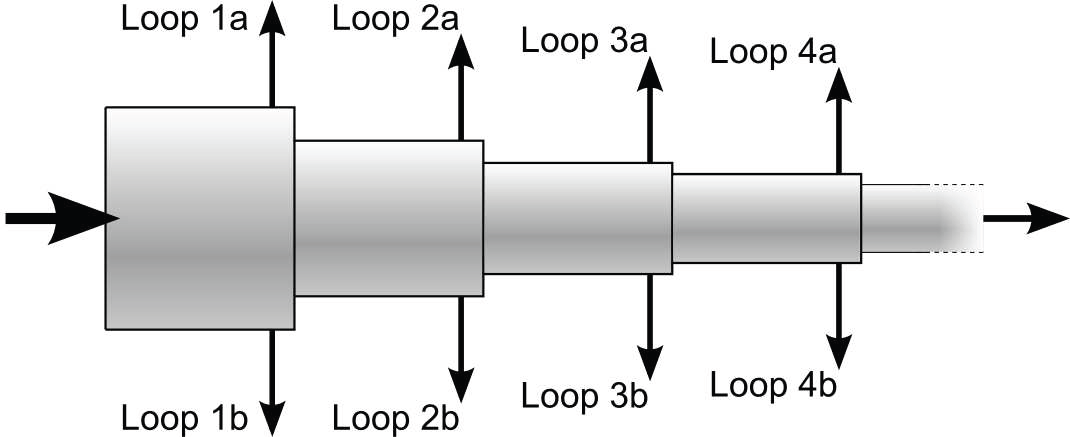

**Figure 12: An illustration of the flow diverting from the header into individual field loops. In this example, two loops extract HTF per section. The diameter of the header is adjusted to maintain optimal flow velocities.**

The optical efficiency at design ($\eta_{opt,des}$) is calculated using the solar position at noon on the summer solstice according to the collector model presented in Section 2.3. The loop aperture area $A_{loop}$ is equal to the sum of the aperture of each collector assembly in the loop, as defined on the Collectors page.

$$A_{loop}=\sum_{i=1}^{N_{sca}}A_{col,i} \tag{2.80}$$

The estimated heat loss is the weighted sum of the heat loss estimate values for each SCA in the loop. Heat loss from each SCA is weighted according to the ratio of the SCA receiver length to the total loop receiver length.

$$\dot{q}_{hl,loop}=\sum_{i=1}^{N_{sca}}\dot{q}_{hl,des,i}\ \frac{L_{i}}{L_{loop,tot}} \tag{2.81}$$

The design-point HTF mass flow through each individual header is determined using the total solar field mass flow rate from Eq.[2.79]. The number of field subsections is specified by the user. Each field section is assumed to have two symmetric subsections; consequently, the user can select any even number of subfield sections on the Solar Field page in System Advisor. The number of field sections ($N_{fsec}$) determines the overall header piping layout. The first three possible selections are illustrated in Figure 13.

System Advisor determines the number of loop extraction points per header by dividing the total number of loops by two times the number of field sections (two loops extract at a single point, per Figure 12).

$$N_{hsec}=\left[\frac{N_{loops}}{2\cdot N_{fsec}}\right] \tag{2.82}$$

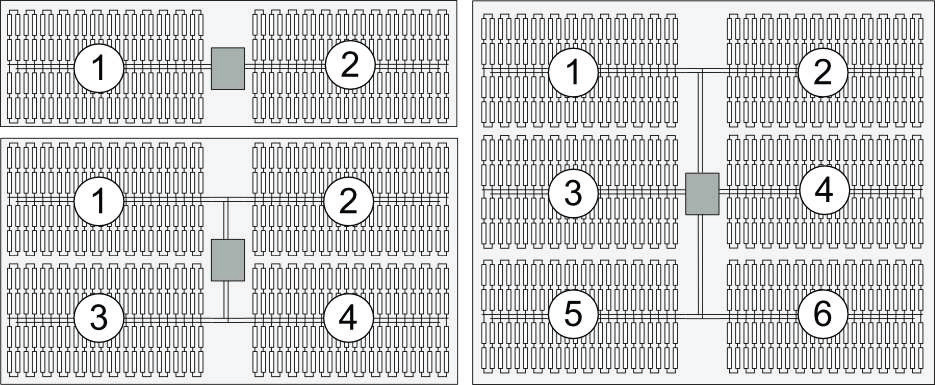

**Figure 13: Three possible field configurations modeled by System Advisor. Two (top left), four (bottom left), and six(right) field subsections are shown.**

Four different mass flow rates characterize the solar field. These are (1) the total solar field mass flow rate from Eq.[2.79], (2) the mass flow rate in the runner pipe that feeds the header sections, (3) the mass flow rate in each individual header, and (4) the mass flow rate in a single loop. The single-header mass flow rate (item 3) is defined as:

$$\dot{m}_{hdr}=\frac{2\cdot\dot{m}_{run}}{N_{fsec}} \tag{2.83}$$

#### Runner piping

The runner pipe diameter is sized to match the velocity limits specified by the user according to the total mass flow rate carried by the runner piping at design. The runner piping is broken conceptually into multiple sections, as follows:

1. The first section is the piping in and around the power block. The main runner pipes - the ones extending from the power cycle to the North and to the South - each carry one half of the total solar field mass flow rate.

$$\dot{m}_{runsec,1}=\frac{\dot{m}_{sf,des}}{2} \tag{2.84}$$

2. The second section includes the runner piping between the boundary of the power cycle out to the first set of subfield headers. Depending on the solar field configuration, the mass flow rate carried through this section may be either half of the total mass flow rate, or half of the flow less the amount sent to immediately adjacent subfields as in the case of the six-subsection arrangement in Figure 13. The general formula for the section 2 runner piping mass flow rate is shown in Eq. [2.85]. Note that for a field with only two subfields, there is no second runner piping section since the power cycle piping directly feeds the subfield headers. 

$$\dot{m}_{runsec,2}=\frac{\dot{m}_{sf,des}}{2}\left(1-\frac{N_{fsec}\pmod{4}}{N _{fsec}}\right) \tag{2.85}$$

3. For solar fields with more than 6 subsections, subsequent runner piping sections scale down in diameter as the mass flow rate decreases. The mass flow rate of each runner section \(k\) is equal to the mass flow rate from the previous section less the mass flow diverted to its subfields.

_For_ $k=2,N_{runsec}$:

$$\dot{m}_{runsec,k}=\dot{m}_{runsec,k-1}-2\cdot\dot{m}_{hdr} \tag{2.86}$$

The number of runner sections $N_{runsec}$ is dependent on the number of subfields specified by the user on the Solar Field page, and is calculated as shown in Eq. [2.87]. Note that the additional section represents the fixed piping length in and around the power cycle that connects to the solar field.
$$N_{runsec}=\lfloor\frac{N_{f,sec}}{4}\rfloor+1 \tag{2.87}$$

The runner piping diameter is sized according to the design-point mass flow rate for each section and the maximum HTF velocity limit specified on the Solar Field page.

_For_ $k=1,N_{runsec}$:

$$D_{runsec,k}=\sqrt{\frac{4\cdot\dot{m}_{runsec,k}}{\rho_{ave}\,v_{ max}\,\pi}} \tag{2.88}$$

Runner piping lengths are determined according to solar field geometry and subfield layout. Length calculations are discussed in detail on page 48.

#### Subfield header piping

Like the runner piping diameter calculations, the subfield header design must balance the need for a varying pipe diameter with practical complexity limitations. Using a different header diameter for each of the $N_{hsec}$ loop sections along the header may optimize performance, but the marginal benefits of consistent flow velocity are likely outweighed by the cost of assembling the piping. Thus, System Advisor only adjusts the header diameter for a section if the flow velocity falls outside of the specified range, and limits the total number of unique header diameters to 10.

Each unique header section $i$ is assigned to a header diameter group $j$ as depicted in Figure 14. The diameter of the first header section is calculated using a mass flow rate equal to $\dot{m}_{hdrsec,j,0}$ the flow rate at the header group $j$ inlet. Using this pipe diameter, the minimum allowable HTF mass flow rate is calculated for the lower velocity limit at group $j$.

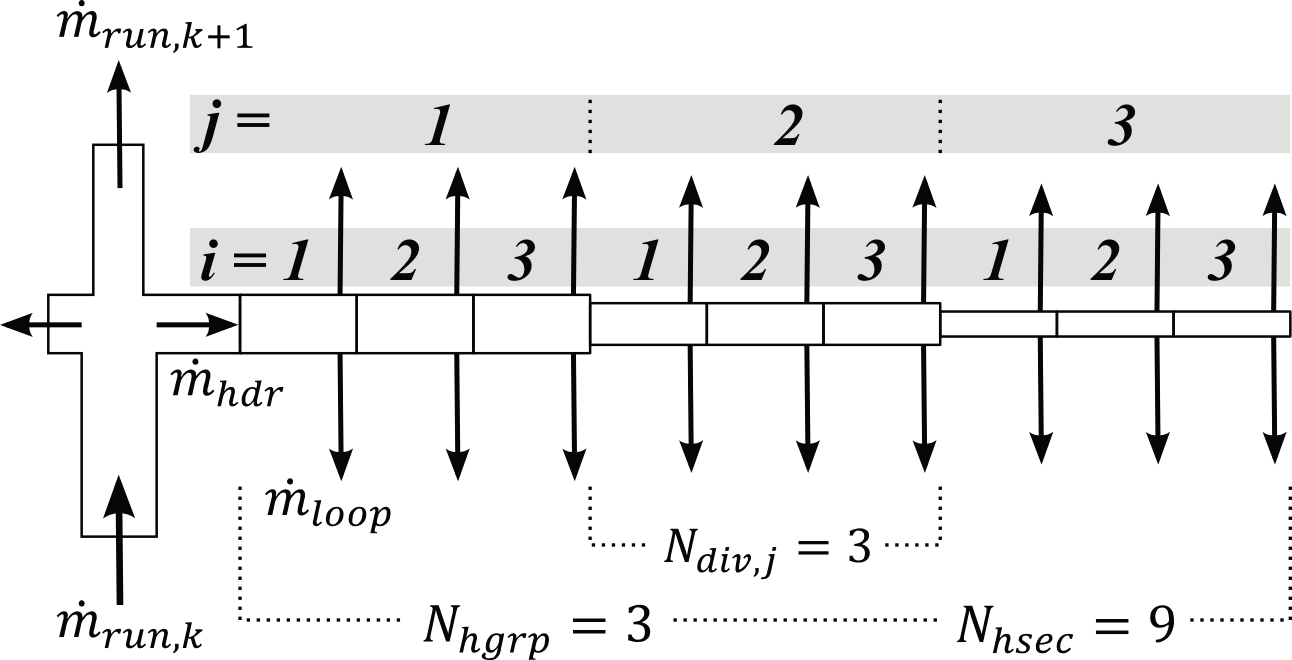

**Figure 14:Numberingschemeandnotablemass flowratesforthesubfield andrunnerpiping.**

$$\dot{m}_{min,j}=\rho_{ave}\;v_{min}\;\pi\;\frac{D_{hdr,j}^{2}}{4} \tag{2.89}$$

The same diameter $D_{hdr,j}$ is applied to the next $N_{div,j}$ header divisions in each group $j$ among $N_{hgrp}$ groups before being recalculated, but the section $i$ mass flow rate is constantly adjusted to be incrementally smaller as flow is diverted into the loops.

_For_ $j=1,N_{hgrp}$:

$$N_{div,j}=\left\lfloor\frac{\dot{m}_{hdrsec,j,0}-\dot{m}_{min,j}}{2\;\dot{m}_{ loop}}\right\rfloor \tag{2.90}$$

_And for_ $i=1,N_{div,j}$:

$$\dot{m}_{hdrsec,j,i}=\dot{m}_{hdrsec,j,i-1}-2\;\dot{m}_{loop} \tag{2.91}$$

The diameter for each group is calculated according to Eq.[2.92], and a table of header diameters is written as an output file11.

$$D_{hdr,j}=\sqrt{\frac{4\cdot\dot{m}_{hdr,j,0}}{\rho_{ave}\;v_{max}\;\pi}} \tag{2.92}$$

The header diameters are restricted to common piping schedule diameters and thicknesses.

The possible pipe schedule selections are shown in Table 9[14]. When selecting the best pipe schedule, the code looks for the smallest pipe diameter that meets the flow velocity restriction. Often, the realized pipe schedule is somewhat larger than the idealized piping diameter.

**Table 9: Pipe sizing schedules used in the trough model. The wall thickness and schedule are selected to match a pressure rating of 25 bar.**

| Nominal pipe size (in) | Schedule | Internal diameter (in) | Internal diameter (m) | Wall thickness (m) |
|---|---|---|---|---|
| 2.5 | A | 2.71 | 0.0688 | 0.0013 |
| 3 | A  | 3.33 | 0.0847 | 0.0016 |
| 4 | B | 4.26 | 0.1082 | 0.0021 |
| 6 | B | 6.36 | 0.1615 | 0.0031 |
| 8 | C | 8.13 | 0.2064 | 0.0040 |
| 10 | D | 10.25 | 0.2604 | 0.0051 |
| 12 | C | 12.25 | 0.3112 | 0.0060 |
| 14 | C | 13.38 | 0.3398 | 0.0066 |
| 16 | C | 15.38 | 0.3906 | 0.0076 |
| 18 | D | 17.25 | 0.4382 | 0.0085 |
| 20 | C | 19.25 | 0.4890 | 0.0095 |
| 22 | C | 21.00 | 0.5334 | 0.0104 |
| 24 | C | 23.00 | 0.5842 | 0.0113 |
| 26 | C | 25.00 | 0.6350 | 0.0123 |
| 28 | D | 26.75 | 0.6795 | 0.0132 |
| 30 | D | 28.75 | 0.7303 | 0.0142 |
| 32 | D | 30.75 | 0.7811 | 0.0152 |
| 34 | E | 32.62 | 0.8286 | 0.0161 |
| 36 | E | 34.50 | 0.8763 | 0.0170 |
| 42 | D* | 40.50 | 1.0287 | 0.0200 |
| 48 | D* | 46.00 | 1.1684 | 0.0227 |
| 54 | D* | 52.00 | 1.3208 | 0.0256 |
| 60 | D* | 58.00 | 1.4732 | 0.0286 |
| 66 | D* | 64.00 | 1.6256 | 0.0316 |
| 72 | D* | 70.00 | 1.7780 | 0.0345 |

_*Schedule D was the thickest pipe wall available in these diameters_

#### Piping HTF volume

In addition to the header and runner solar field piping, System Advisor calculates the HTF volume associated with the power block steam generator system (SGS) and pump piping. This HTF volume is used in the thermal inertia calculations of the power block during warm-up and transients. System Advisor specifically models the following components:

1. Individual pump suction line from the suction header to the pump inlet
2. Individual pump discharge line from the pump discharge to the discharge header
3. Pump discharge header
4. Collector field outlet header to the expansion vessel or thermal storage tank
5. Steam generator supply header
6. Inter-steam-generator piping
7. Steam generator exit header to expansion vessel or to thermal storage

Several assumptions are used to determine the HTF volume of each of these piping lines. The design-point HTF velocity is assumed to be 1.85 $\frac{m}{s}$[14], and the system is assumed to have three pumps, each capable of producing 50% of the design-point flow rate. The line lengths are fixed and do not scale with power block or solar field size, though the piping diameter does scale. Table 10 shows the assumed piping length for each line.

**Table 10: The assumed piping lengths for the steam generator and pumping system.**

| Line | Description                                | Length (m) |
|------|--------------------------------------------|------------|
| 1    | Pump suction header to pump inlet          | 45         |
| 2    | Pump discharge to discharge header         | 45         |
| 3    | Pump discharge header                       | 100        |
| 4    | Collector field to expansion vessel/TES    | 120        |
| 5    | Steam generator supply header              | 80         |
| 6    | Inter-steam-generator piping               | 120        |
| 7    | Steam generator exit to exp. vessel/TES    | 80         |

Sizing for the individual piping lines depends on the HTF volumetric flow rate. The design-point solar field mass flow rate $\dot{m}_{sf,des}$ is related to the design-point power block mass flow rate by the solar multiple, as shown in Eq.[2.93]. The volumetric flow rate is equal to the mass flow rate divided by the HTF density.

$$\dot{m}_{pb,des}=\frac{\dot{m}_{sf,des}}{SM} \tag{2.93}$$

Piping lines 1-2 in Table 10 each carry a volumetric flow of $\frac{1}{2}\cdot\dot{\vec{V}}_{sf}$, piping lines 3-4 each carry the full $\dot{\vec{V}}_{sf}$, and piping lines 5-7 carry $\dot{\vec{V}}_{pb}$.

#### 2.5.2 Piping layout and components

The remaining pipe sizing calculations are an aggregation of simple estimates based on the total solar field size and selected configuration. The piping model is organized into four convenient domains, each of which individually calls the main pressure drop calculation algorithm. These domains are the field inlet/outlet/cross-over piping (IOCop), the receiver assemblies and interspersed connective piping, the hot and cold runner pipe, and the hot and cold headers. The valve and joint component assignments for each domain are shown in Table 11.

**Table 11: **Variable assignments for the piping equipment by domain. Referenced equations are denoted with square brackets. The pressure drop coefficients for the various piping components are defined in the $k_{\Delta P}$ column.**

| Item | \(k_{\Delta P}\) | IOCop | Receivers | Runners Hot | Runners Cold | Headers Hot | Headers Cold |
|---|---|---|---|---|---|---|---|
| Length of pipe Eq.   | -                | [2.94]           | [2.95]           | [2.96]     | [2.96]     | [2.97]     | [2.97]     |
| Eval. mass flow      | -                | $\dot{m}_{loop}$ | $\dot{m}_{loop}$ | $\dot{m}_{run}$ | $\dot{m}_{run}$ | $\dot{m}_{hdr}$ | $\dot{m}_{hdr}$ |
| Eval. temperature    | -                | $T_{sf,ave}$   | $\bar{T_{i}}$  | $T_{sf,out}$ | $T_{sf,in}$ | $T_{sf,out}$ | $T_{sf,in}$ |
| Tube diameter        | -                | $D_{2}$        | $D_{2}$        | $D_{run}$ | $D_{run}$ | $D_{hdr,i}$ | $D_{hdr,i}$ |
| Expansions           | 0.50             | 0                | 0                | [2.98]     | [2.98]     | $N_{hgrp}$ | 0          |
| Contractions         | 0.50             | 0                | 0                | 0          | 0          | $N_{hgrp}$ | 0          |
| Standard elbows      | 0.9              | 2                | $10/loop$      | 0          | 0          | 0          | 0          |
| Medium elbows        | 0.75             | 0                | 0                | 0          | 0          | 0          | 0          |
| Long elbows          | 0.6              | 0                | 0                | [2.99]     | [2.99]     | 1          | 1          |
| Gate valves          | 0.19             | 2                | 0                | 1          | 1          | 0          | 0          |
| Globe valves         | 10               | 0                | 0                | 0          | 0          | 0          | 0          |
| Check valves         | 2.5              | 0                | 0                | 0          | 0          | 0          | 0          |
| Loop weldolets       | 1.8              | 2                | 0                | 0          | 0          | 0          | 0          |
| Loop control valves  | 10               | 1                | 0                | 0          | 0          | 0          | 0          |
| Ball joint assemblies| 8.69             | 0                | $3+N_{sca}$    | 0          | 0          | 0          | 0          |


The length-of-pipe equations referenced in Table 11 are shown in Eq.'s[2.94-2.97], and the number of elbows for the runner pipe is calculated in Eq.[2.99]. The number of expansions and contractions in the hot and cold runner piping depends on the number of subfield sections in the solar field. Assuming the runner piping steps down/up in diameter as it moves from the innermost subfields to those farther away from the power block, an expansion/contraction is applied for each step in runner piping diameter. This quantity is calculated in Eq.[2.98].

$$L_{IOCop} = 40[m]+L_{spacing} \tag{2.94}$$
$$L_{loop,tot} = \sum_{i=1}^{N_{sca}}(L_{i}+L_{sca,gap})\tag{2.95}$$
$$L_{run,tot} = \sum_{i=1}^{N_{runsec}}L_{runsec,i}\tag{2.96}$$
$$L_{hdr} = \sum_{i=1}^{N_{hsec}}2\cdot(L_{spacing}+4.275[m])\tag{2.97}$$
$$N_{run,exp} = \left|\frac{N_{fsec}}{4}\right|\tag{2.98}$$
$$N_{elbow,L} = \max\left(\left|\frac{L_{run}}{70[m]}+.5\right|\cdot 4,8\right) \tag{2.99}$$

The constant additional piping length of $4.275m$ in Eq.[2.97] represents the normalized piping length per loop required for thermal expansion/contraction compensation [14]. Thermal cycling of the piping causes the piping to expand or contract axially such that short diverting bends must be interspersed in the field layout to prevent joint separation or buckling.

The runner piping length in Eq.[2.96] is a function of the layout of the field subsections. Considering again Figure 13 on page 42, note that the runner piping length for the field configuration with four field subsections is roughly half of what the field configuration with six field subsections is. For fields with more than four subfields, the runner piping length is a combination of the shortened run from the power block to the first set of field subsections and the full lengths spanning the remainder of the field subsections. In addition to the variable lengths, the runner piping calculations assume a fixed length of 50 $m$ to account for piping in and around the power block. Eq.'s[2.100-2.103] show the length calculations for runner piping sections as they extend from the power block. Each length represents the distance in one direction from the power block: a mirrored counterpart is assumed on the opposite side, and an equivalent length is assumed to account for both hot and cold piping.

$$L_{runsec,1}=50[m] \tag{2.100}$$

_With a "base" runner piping length:_

$$L_{run,base}=2\ L_{spacing}+\frac{L_{loop,tot}}{2} \tag{2.101}$$

_if ${N_{fsec}}/{2}$ is an even number:_

$$L_{runsec,2}=L_{run,base} \tag{2.102}$$

_otherwise:_

$$L_{runsec,2}=2\cdot L_{run,base} \tag{2.103}$$

All subsequent ($i>2$) runner piping lengths are equal to $2\cdot L_{run,base}$. To illustrate the runner pipe length calculations, consider a plant with eight subsections. The power block is located in the center of the solar field between the 3-4 and 5-6 subsections. The runner pipe will have three unique diameters, decreasing in size as it moves away from the power block. The first diameter is sized to carry one-half of the total solar field HTF flow (the other half goes to the subfields on the other side of the power block). The length of this piping is a fixed 50 $m$. The second section will be a shortened length as described in Eq.[2.102] and will also carry one half of the HTF flow to the first two field subsections. The final runner pipe section will be of the length described in Eq.[2.103] and will carry one fourth of the total HTF flow. Return piping for the hot HTF will follow the same pattern in reverse.

#### Performance calculations

The equations for the piping equipment use a coefficient $k_{\Delta P}$ to scale the pressure drop according to a particular component's function and geometry. Pressure drop is calculated using one of three methods according to the type of component. First, pressure drop through a pipe section is calculated using the Reynolds number and friction factor to determine the head loss and pressure difference.

$$\Delta P_{pipe}=hl_{pm}\ \rho\ g\ L_{pipe} \tag{2.104}$$
_Where head loss per meter ($\frac{m}{m}$) is:_

$$hl_{pm}=\frac{fr\,\nu_{ave}^{2}}{2\,D_{pipe}\,g} \tag{2.105}$$

The mean fluid velocity $v_{ave}$ scales with the mass flow rate divided by the pipe cross-sectional area.

$$\nu_{ave}=\frac{\dot{m}}{\rho\,\pi\,\frac{D^{2}}{4}} \tag{2.106}$$

The friction factor _fr_ is a function of the pipe surface relative roughness and the Reynolds number (_Re_). For $Re<2750$, the friction factor is simply $64/Re$, though larger Reynolds numbers are more common in trough systems. The friction factor solution in turbulent regimes requires an iterative solution of an implicit equation, as presented in [9]. The general expression to be solved is:

$$fr=\frac{1}{X^{2}} \tag{2.107}$$

where $X$ can only be expressed as an argument for an implicit equation $F_{x}$.

$$F_{x}=X+2\,\,\log_{10}\left[\frac{Rough}{3.7}+2.51\,\,\frac{X}{Re}\right] \tag{2.108}$$

A solution for $X$ is found when $F_{x}$ is equal to zero. Since no analytical solution exists for $X$, the code iterates until the condition $F_{x}=0$ is satisfied. The function $F_{x}$ for three possible $Re$ values as a function of $X$ are plotted in Figure 15.

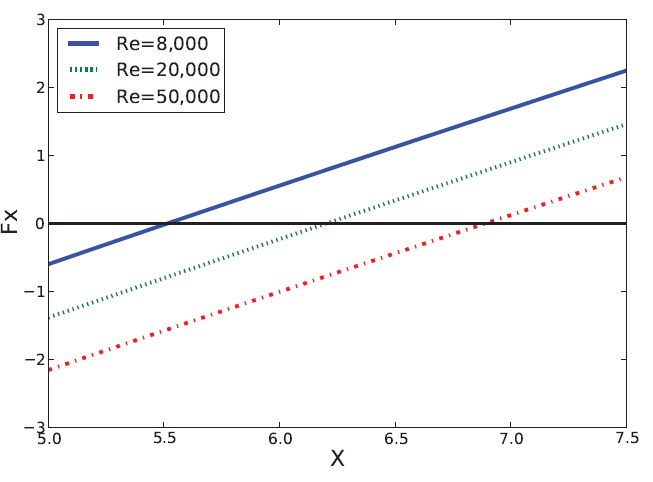

**Figure 15: The solution for Eq.[2.108] at $X=0$ is shown for three unique $Re$ values.**

The second and third methods for pressure calculation apply to the piping equipment rather than the pipe itself, and these require the use of the pressure coefficient $k_{\Delta P}$ from Table 11. For pipe expansions ($D\uparrow$) and contractions ($D\downarrow$), the pressure drop calculation is given in Eq.[2.109].

$$\Delta P_{D\uparrow}=\Delta P_{D\downarrow}=\frac{1}{2}\;k_{\Delta P}\;\rho\;v _{ave}^{2}(N_{hgrp}-1) \tag{2.109}$$

Lastly, System Advisor calculates the pressure drop across the elbows, valves, ball joints, and weldolets.

$$\Delta P_{fit}=k_{\Delta P}\;\frac{D}{f\!\!r}\;hl_{pm}\;\rho\;g\;N_{fit} \tag{2.110}$$

The pressure drop for each piping domain is equal to the sum of pipe, expansion/contraction, and fitting pressure drops allocated to each column of Table 11. Receiver pressure drop is equal to the sum of the pressure drops across each collector assembly in the loop. The total solar field pressure drop is the sum of all the pressure drops from the four piping domains, though the effective pressure drop through the runner and header sections (calculated using Eq.'s [2.104, 2.109, 2.110] above) must be averaged according to the mass flow rate passing through each subsection, as shown in Eq.'s [2.112] and [2.113].

$$\Delta P_{sf}=\Delta P_{loop}+\Delta P_{hdr,hot}+\Delta P_{hdr,cold}+\Delta P _{run,hot}+\Delta P_{run,cold}+\Delta P_{IOcop} \tag{2.111}$$

_Where:_

$$\Delta P_{hdr,cold/hot} = \sum_{j=1}^{N_{hgrp}}\left[\sum_{i=1}^{N_{div,j}}\left(\Delta P_ {pipe,j,i}+\frac{\Delta P_{\uparrow/\downarrow,i}+\Delta P_{fit,i}}{N_{div,j}} \right)\cdot\frac{2\;\dot{m}_{hdrsec,j,i}}{\dot{m}_{hdr}}\right] \tag{2.112}$$
$$\Delta P_{run,cold/hot} = \sum_{i=1}^{N_{runsec}}\left(\Delta P_{pipe,i}+\Delta P_{\uparrow /\downarrow,i}\right)\cdot\frac{\dot{m}_{runsec,i}}{\dot{m}_{hdr}} \tag{2.113}$$

Solar field HTF pumps are assumed to operate continuously over the full range of mass flows between the minimum and maximum rates specified by the user on the Solar Field page. The pumps are located along the cold runner where material stress and HTF density are minimized. The total solar field mechanical pumping power is equal to the pressure drop times the volumetric flow rate, and a pump efficiency value is used to convert mechanical power into an electrical parasitic.

$$\dot{W}_{p,sf}=\frac{\Delta P_{sf}}{\eta_{p}}\;\frac{\dot{m}_{sf}}{\rho_{hdr,cold}} \tag{2.114}$$